# Анализ изменения выручки медицинского центра в 2022 году относительно 2021 года

Подготовил: Поваринцева Наталья (@Taacra)

От медицинского центра получены данные за 2021-2022 года об оказанных услугах и сумме выплат за них.

Дополнительные пояснения, полученные с данными:

* Медицинский кейс - последовательность медицинских услуг, полученных одним застрахованным в одной клинике с интервалом между любыми соседними по дате услугами не более 14 дней. То есть между любыми 2-мя соседними услугами в кейсе не должно быть разрыва более 14 дней.
* Обратившийся в месяц уникальное сочетание месяца оказания услуги индикатора пациента.
* Визит - уникальное сочетание даты оказания услуги, номер застрахованного. То есть один визит это один день, в который застрахованый побывал в клинике. Если он был в одной клинике 2 раза, но в разные дни, то это 2 визита. Если получал услуги (в любом количестве) в одной клинике в один день, то это один визит.

**Цель:** провести анализ и определить ключевые драйверы изменения выручки в 2022 году по сравнению с 2021.

На выручку влияют два фактора:
* количественный - количество оказываемых услуг
* ценовой - установленная цена на услуги.

Ценовая политика является решеним организации, конечно на нее влияют различные факторы:
1. Внешние:
* Спрос - Рыночный запрос оказывает большое влияние на уровень цен. Если на предложение нет покупателя, то его нельзя продать, а высокая потребность, наоборот, позволяет устанавливать высокие цены.
* Конкуренция - необходимость учитывать стоимость аналогичных товаров у конкурентов. Если услуги не уникальны, медициенский центр не может установить тарифы выше, чем у конкурентов.
* Поставщики - тарифы на сырье и оборудование определяют себестоимость оказываемых услуг.
* Государственное регулирование - Правительство имеет право регулировать работу коммерческих фирм, требовать, чтобы они сдерживали рост ставок, не шли на прямой обман или сговор.
* Инфляция
2. Внутренние:
* зарплата врачей и прочего персонала.
* организационный процесс в мед.центре.
* использование и нагрузка на дорогостоящее оборудование и потребность в его замене.
* целевая аудитория, на которую направлена деятельность мед. центра.

На количественный фактор вляиют следующие факторы:
- ценовая политика (выше / ниже ближайших конкурентов)
- наличие высококвалифицированного персонала
- диапозон предлагаемых услуг
- целевая аудитория, на которую направлена деятельность мед. центра
- известность медицинского центра (реклама)

## План исследования

1. Загрузить и рассмотреть полученные данные
2. Подготовить данные к анализу: обработать пропуски и дубликаты, проверить корректность и наполненность данных, обогатить данные.
3. Выявить тенденции основных показателей:
     * объем выручки,
     * количество и структура оказанных услуг
4. Выявить факт, процент изменения цены услуг и период в который это произошло изменение
5. Анализ динамики среднего чека
6. Исследование профилей пациентов
6. Выявление причин изменения выручки
7. Итоговые выводы и рекомендации

## 1. Исходные данные и предобработка данных

Загружаем библиотеки и данные от медицинского центра. Изучаем данные и выполяем предобработку. Проверим и обработаем:

* пропусков 
* явные и неявне дубликаты;
* соответсвие типов данных;
* корректность и наполненость данных.
* обогащение данных доп. столбцами

### 1.1. Загрука библиотек и данных

Загружаем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime, timedelta

In [2]:
pd.options.display.float_format = '{:,.2f}'.format # Проставляем формат чисел, удобный для восприятия

In [3]:
# зададим цвет для графиков
color_1 = '#E9B824' 
color_2 = '#219C90' 

Загружаем данные:

In [4]:
try:
    data = pd.read_excel('C:/Users/taacr/Desktop/Учеба_Аналитика данных/Мастерская/data_test_task_2022.xlsx')
except:
    print('ошибка')

data.head(10)

record_id service_date  \
0  30268157003   2021-01-24   
1  30268157103   2021-01-24   
2  30268157203   2021-01-24   
3  30268157303   2021-01-24   
4  30268157403   2021-01-24   
5  30268157503   2021-01-24   
6  30268157603   2021-01-24   
7  30268157703   2021-01-26   
8  30268157803   2021-01-26   
9  30268157903   2021-01-26   

                                        service_name  service_amount  \
0                                    Прием первичный            1470   
1  Взятие материала на посев, цитологическое иссл...             284   
2  Посев отдел, дыхательных путей - слизистая зев...            1134   
3      Общий анализ крови (лейкоцитарная форм,, СОЭ)             693   
4                                Ревматоидный фактор             420   
5                                 С-реактивный белок             420   
6                Взятие крови из периферической вены             158   
7                                    Прием первичный            1470   
8                           Магнитотерапия (1 сеанс)            1040   
9                     УВЧ-терапия (1 сеанс) (1 поле)            1040   

   service_number  insured  sex_id  age_for_service_date  
0               1   490777    2.00                    26  
1               1   490777    2.00                    26  
2               1   490777    2.00                    26  
3               1   490777    2.00                    26  
4               1   490777    2.00                    26  
5               1   490777    2.00                    26  
6               1   490777    2.00                    26  
7               1   490777    2.00                    26  
8               1   490777    2.00                    26  
9               1   490777    2.00                    26

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


Описание данных, полученные от Медицинского центра:

* `record_id` - уникальный идентификатор строки данных. Тип данных - целое число;
* `service_date` - дата оказания медицинской услуги. Тип данных - строка;
* `service_name` - наименование медицинской услуги. Тип данных - строка;
* `service_number` - количество услуг. Тип данных - целое число;
* `service_amount` - сумма выплат (стоимость оказанных услуг в рублях). Тип данных - целое число;
* `insured` - уникальный идентификатор пациента. Тип данных - целое число;
* `sex_id` - пол пациента. Тип данных - число;
* `age_for_service_date` - возраст пациента. Тип данных - целое число.

### 1.2. Общие необходимые функции

In [6]:
#Формула для формирования столбчайтой диаграммы
def plot_graf(xpt, ypt1, y_name_pt1, ypt2, y_name_pt2, name_graf, d_name):
    fig = go.Figure()
    fig.add_trace(go.Bar(x = xpt, y = ypt1, name=y_name_pt1, text=ypt1, marker_color=color_1))
    fig.add_trace(go.Bar(x = xpt, y = ypt2, name=y_name_pt2, text=ypt2, marker_color=color_2))
    #fig.update_layout(barmode='stack')
    fig.update_layout(                      title=dict(text = name_graf, font={"size": 22}),
                      title_x = 0.5,
                      yaxis_title=d_name,
                      xaxis_title="Категории")
    fig.show()
    
# Формула для формирования и подписи горизонтальных столбчатых диаграмм    
def annotate_dig(xs,ys,color_xy, title_name):
    plt.barh(ys, xs, color=color_xy)
    plt.title(title_name, fontsize=12)
    for pos in ['right', 'top']:
        plt.gca().spines[pos].set_visible(False)
    for x,y in zip(xs,ys):
        label = "{: .0f}".format(x)
        plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(-20,-4), 
                 ha='center')

## 2. Предобработка данных

### 2.1. Проверка и анализ пропусков

Судя по обшему анализу данных пропуски присутсвуют только в столбце `sex_id` в количестве 21 шт. Посмотрим возможно ли заполнить поля на основе других данных. Выявим номера застрахованных, по которым отсутсвует признак пола.

In [7]:
data.loc[data['sex_id'].isna(), 'insured'].unique()

array([512590, 221581], dtype=int64)

Проверим присутсвует ли признак пола у данных застрахованных в других операциях:

In [8]:
data.loc[data['insured']==512590, 'sex_id']

4411     NaN
4412     NaN
4413     NaN
4414     NaN
4415     NaN
4416     NaN
4417     NaN
4418     NaN
4419     NaN
4420     NaN
4421     NaN
4422     NaN
4423     NaN
4424     NaN
4425     NaN
18016    NaN
18017    NaN
29311   2.00
29312   2.00
29313   2.00
29314   2.00
Name: sex_id, dtype: float64

In [9]:
data.loc[data['insured']==221581, 'sex_id']

8880    NaN
8881    NaN
12357   NaN
17987   NaN
Name: sex_id, dtype: float64

По застрахованному с номером 512590 присутсвует признак пола в более позних данных. Заполним по нему пропуски признаком - 2. По застрахованому 221581 данные отсутсвуют. В виду незначительности пропусков (4 записи) оставим данные в датасете в исходном виде.

In [10]:
data.loc[(data['insured']==512590) &  data['sex_id'].isna(), 'sex_id'] = 2.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85365 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


Итого в данных осталось 4 не заполненых поля с признаком пола.

### 2.2. Проверка и анализ дубликатов

Проверим на явные дубликаты:

In [12]:
data.duplicated().sum()

0

Явных дубликатов не выявлено. Проверим на неявные дубликаты:

In [13]:
data['record_id'].nunique ()

85369

Количество уникальных идентификаторов данных соответвует количеству данных в датасете. Задвоения нет.

Проверим уникальные значения в столбц `sex_id`:

In [14]:
data['sex_id'].unique ()

array([ 2.,  1., nan])

Есть два пола и пропуски в данных. Проверим уникальные значения в столбц `service_name`:

In [15]:
data['service_name'].unique ()

array(['Прием первичный',
       'Взятие материала на посев, цитологическое исследование ( риноцитограмма)',
       'Посев отдел, дыхательных путей - слизистая зева с определением чувствительности к антибиотикам',
       'Общий анализ крови (лейкоцитарная форм,, СОЭ)',
       'Ревматоидный фактор', 'С-реактивный белок',
       'Взятие крови из периферической вены', 'Магнитотерапия (1 сеанс)',
       'УВЧ-терапия (1 сеанс) (1 поле)', 'Прием повторный',
       'Смазывание глотки лекарственными формами', 'Взятие мазка',
       'Обработка вульвы', 'Обработка шейки матки',
       'Гинекологический мазок', 'Общий анализ мочи', 'Креатинин',
       'Мочевая кислота', 'Мочевина', 'Общий белок',
       'Ультразвуковое исследование почек и надпочечников',
       'Ультразвуковое исследование мочевого пузыря',
       'ЛПНП (липопротеиды низкой плотности, бета-липопротеиды)',
       'Триглицериды', 'Холестерин', 'АЛТ (аланинаминотрансфераза)',
       'Альдостерон', 'Кортизол (кровь)', 'Ренин + Ангио

В поле`service_name` выявлены следующие неявные дубликаты:
* 'Прием врача эндокринолога, руководителя направления Блох С,П' и 'Прием врача эндокринолога, руководителя направления Блох С.П'
* 'Прием мануального терапевта первичный' и 'Прием мануального терапевта, первичный'
* 'Прием мануального терапевта повторный' и 'Прием мануального терапевта, повторный'
* 'Прием рефлексотерапевта первичный' и 'Прием рефлексотерапевта, первичный'
* 'Прием рефлексотерапевта повторный' и 'Прием рефлексотерапевта, повторный'
* 'Прием терапевта, первичный' и 'Прием трапевта, первичный'
* 'Перевязка гнойных ран (более 4 кв.см.)' и 'Перевязка гнойных ран (более 4см,кв.)'
* 'Перевязка гнойных ран (менее 4 кв,см.)' и 'Перевязка гнойных ран (менее 4 кв.см.)' и 'Перевязка гнойных ран (менее 4см,кв.)'
* 'Перевязка чистая (более 4 кв.см.)' и 'Перевязка чистая (более 4 см,кв.)'
* 'Перевязка чистая (менее 4 кв,см.)' и 'Перевязка чистая (менее 4 кв.см.)' и 'Перевязка чистая (менее 4 см,кв.)'
* 'Прием терапевта на дому (до МКАД)' и 'Прием на дому (до МКАД)'
* 'Прием первичный' и 'Прием терапевта, первичный'
* 'Прием терапевта , повторный' и 'Прием повторный'
* 'Epstein Barr virus  капсидный антиген IgM' и 'Epstein Barr virus IgM'
* 'Epstein Barr virus IgG' и 'Epstein Barr virus капсидный антиген IgG'
* 'В,в капельная инфузия (за 1 процедуру без стоимости лекарств)' и 'В/в капельная инфузия (за 1 процедуру без стоимости лекарств), длительность  до 60 минут'
* 'Гемостазиограмма (Коагулограмма: Антитромбин III, АЧТВ, МНО, Плазминоген, Протромбиновое время, РФМК, Тромбиновое время, Фибриноген, Активность' и 'Гемостазиограмма (Коагулограмма: Антитромбин III, АЧТВ, МНО, Плазминоген, Протромбиновое время, РФМК, Тромбиновое время, Фибриноген, Активность'
* 'Исследование глазного дна щелевой лампой' и 'Исследование глазного дна щелевой лампой (офтальмоскопия)'
* 'Комплекс на операцию: (Общий анализ крови (без лейкоцитарной формулы), СОЭ, Лейкоцитарная формула, Группа крови, Rh-фактор, Келл, АЛТ' и 'Комплекс на операцию: (Общий анализ крови (без лейкоцитарной формулы), СОЭ, Лейкоцитарная формула, Группа крови, Rh-фактор, Келл, АЛТ (аланинаминотрансфераза), АСТ '
* 'Массаж пояснично-крестцового отдела' и 'Классический лечебный массаж пояснично-крестцового отдела'
* 'Обработка вульвы' и 'Обработка вульвы лекарственными препаратами'
* 'Обработка шейки матки' и 'Обработка шейки матки лекарственными препаратами'
* 'Проведение комплекса специфических вестибулярных тестов' и 'Проведение комплекса специфических вестибулярных тестов у пациентов с головокружением'
* 'Продувание слуховых труб по Политцеру' и 'Продувание слуховых труб по Политцеру с двух сторон'
* 'Рентгенография грудного отдела (2 снимка)' и 'Рентгенография (цифровая) грудного отдела ( 2 снимка, запись на диск)'
* 'Рентгенография копчика (2 снимка)' и 'Рентгенография (цифровая) копчика (2 снимка, запись на диск)'
* 'Рентгенография (цифровая) крестцово-подвздошного сочленения ( запись на диск)' и 'Рентгенография крестцово-подвздошного сочленения'
* 'Рентгенография крупного сустава (2 снимка)' и 'Рентгенография (цифровая) крупного сустава (2 снимка, запись на диск)'
* 'Рентгенография (цифровая) кистей или стоп ( запись на диск)' и 'Рентгенография кистей или стоп'
* 'Рентгенография (цифровая) легких в прямой проекции ( запись на диск)' и 'Рентгенография легких в прямой проекции'
* 'Рентгенография (цифровая) мелких суставов (стопа, кисть, пяточная кость в 2-проекциях, запись на диск)' и 'Рентгенография мелких суставов (стопа, кисть, пяточная кость в 2-проекциях)'
* 'Рентгенография (цифровая) носоглотки ( запись на диск)' и 'Рентгенография носоглотки'
* 'Рентгенография одного отдела позвоночника: функциональные пробы (сгибание, разгибание (2 снимка)' и 'Рентгенография (цифровая) одного отдела позвоночника: функциональные пробы (сгибание, разгибание, 2 снимка, запись на диск)'
* 'Рентгенография (цифровая) органов грудной клетки ( 2 проекции, запись на диск )' и 'Рентгенография органов грудной клетки ( 2 проекции )'
* 'Рентгенография (цифровая) пояснично-крестцового отдела позвоночника ( 2 снимка, запись на диск)' и 'Рентгенография пояснично-крестцового отдела позвоночника (2 снимка)'
* 'Рентгенография (цифровая) придаточных пазух носа ( запись на диск)' и 'Рентгенография придаточных пазух носа'
* 'Рентгенография (цифровая) ребер, грудины (2 снимка, запись на диск)' и 'Рентгенография ребер, грудины (2 снимка)'
* 'Рентгенография (цифровая) шейного отдела позвоночника (2 снимка, запись на диск)' и 'Рентгенография шейного отдела позвоночника (2 снимка)'
* 'Рентгенография, рентгеноскопия пищевода' и 'Рентгенография, рентгеноскопия стандарт (пищевод, желудок, двенадцатиперстная кишка)'
* 'Обзорная рентгенография (цифровая) молочных желез в прямой и косых проекциях ( запись на диск)' и 'Обзорная рентгенография молочных желез в прямой и косых проекциях'
* 'Снятие швов' и 'Снятие швов, одна локализация'
* 'С-реактивный белок' и 'С-реактивный белок (ультрачувствительный)'
* 'Удаление кожных образований (хирургическим путем)' и 'Удаление кожных образований хирургическим путем 1ед, на теле (диаметром до 0.5 см.)'
* 'Удаление серной пробки  (за одно ухо)' и 'Удаление серных пробок (за ухо)'
* 'Ультразвуковое исследование органов мошонки' и 'Ультразвуковое исследование органов мошонки с ДС сосудов'
* 'Ультразвуковое исследование щитовидной железы' и 'Ультразвуковое исследование щитовидной железы с ДС сосудов'

Обработаем неявные дубликаты, приведя значение к одному.

In [16]:
data.loc[data['service_name']=='Прием врача эндокринолога, руководителя направления Блох С,П', 'service_name'] = 'Прием врача эндокринолога, руководителя направления Блох С.П'
data.loc[data['service_name']=='Прием мануального терапевта первичный', 'service_name'] = 'Прием мануального терапевта, первичный'
data.loc[data['service_name']=='Прием мануального терапевта повторный', 'service_name'] = 'Прием мануального терапевта, повторный'
data.loc[data['service_name']=='Прием рефлексотерапевта первичный', 'service_name'] = 'Прием рефлексотерапевта, первичный'
data.loc[data['service_name']=='Прием рефлексотерапевта повторный', 'service_name'] = 'Прием рефлексотерапевта, повторный'
data.loc[data['service_name']=='Прием трапевта, первичный', 'service_name'] = 'Прием терапевта, первичный'
data.loc[data['service_name']=='Перевязка гнойных ран (более 4см,кв.)', 'service_name'] = 'Перевязка гнойных ран (более 4 кв.см.)'
data.loc[data['service_name']=='Перевязка гнойных ран (менее 4 кв,см.)', 'service_name'] = 'Перевязка гнойных ран (менее 4 кв.см.)'
data.loc[data['service_name']=='Перевязка гнойных ран (менее 4см,кв.)', 'service_name'] = 'Перевязка гнойных ран (менее 4 кв.см.)'
data.loc[data['service_name']=='Перевязка чистая (более 4 см,кв.)', 'service_name'] = 'Перевязка чистая (более 4 кв.см.)'
data.loc[data['service_name']=='Перевязка чистая (менее 4 кв,см.)', 'service_name'] = 'Перевязка чистая (менее 4 кв.см.)'
data.loc[data['service_name']=='Перевязка чистая (менее 4 см,кв.)', 'service_name'] = 'Перевязка чистая (менее 4 кв.см.)'
data.loc[data['service_name']=='Прием терапевта на дому (до МКАД)', 'service_name'] = 'Прием на дому (до МКАД)'
#data.loc[data['service_name']=='Прием первичный', 'service_name'] = 'Прием терапевта, первичный'
#data.loc[data['service_name']=='Прием повторный', 'service_name'] = 'Прием терапевта , повторный'
data.loc[data['service_name']=='Epstein Barr virus капсидный антиген IgM', 'service_name'] = 'Epstein Barr virus IgM'
data.loc[data['service_name']=='Epstein Barr virus капсидный антиген IgG', 'service_name'] = 'Epstein Barr virus IgG'
data.loc[data['service_name']=='В,в капельная инфузия (за 1 процедуру без стоимости лекарств)', 'service_name'] = 'В/в капельная инфузия (за 1 процедуру без стоимости лекарств), длительность до 60 минут'
data.loc[data['service_name']=='Гемостазиограмма (Коагулограмма: Антитромбин III, АЧТВ, МНО, Плазминоген, Протромбиновое время, РФМК, Тромбиновое время, Фибриноген, Активность', 'service_name'] = 'Гемостазиограмма (Коагулограмма: Антитромбин III, АЧТВ, МНО, Плазминоген, Протромбиновое время, РФМК, Тромбиновое время, Фибриноген, Активность'
data.loc[data['service_name']=='Исследование глазного дна щелевой лампой', 'service_name'] = 'Исследование глазного дна щелевой лампой (офтальмоскопия)'
data.loc[data['service_name']=='Комплекс на операцию: (Общий анализ крови (без лейкоцитарной формулы), СОЭ, Лейкоцитарная формула, Группа крови, Rh-фактор, Келл, АЛТ', 'service_name'] = 'Комплекс на операцию: (Общий анализ крови (без лейкоцитарной формулы), СОЭ, Лейкоцитарная формула, Группа крови, Rh-фактор, Келл, АЛТ (аланинаминотрансфераза), АСТ '
data.loc[data['service_name']=='Массаж пояснично-крестцового отдела', 'service_name'] = 'Классический лечебный массаж пояснично-крестцового отдела'
data.loc[data['service_name']=='Обработка вульвы', 'service_name'] = 'Обработка вульвы лекарственными препаратами'
data.loc[data['service_name']=='Обработка шейки матки', 'service_name'] = 'Обработка шейки матки лекарственными препаратами'
data.loc[data['service_name']=='Проведение комплекса специфических вестибулярных тестов у пациентов с головокружением', 'service_name'] = 'Проведение комплекса специфических вестибулярных тестов'
data.loc[data['service_name']=='Продувание слуховых труб по Политцеру с двух сторон', 'service_name'] = 'Продувание слуховых труб по Политцер'
data.loc[data['service_name']=='Рентгенография грудного отдела (2 снимка)', 'service_name'] = 'Рентгенография (цифровая) грудного отдела ( 2 снимка, запись на диск)'
data.loc[data['service_name']=='Рентгенография копчика (2 снимка)', 'service_name'] = 'Рентгенография (цифровая) копчика (2 снимка, запись на диск)'
data.loc[data['service_name']=='Рентгенография крестцово-подвздошного сочленения', 'service_name'] = 'Рентгенография (цифровая) крестцово-подвздошного сочленения ( запись на диск)'
data.loc[data['service_name']=='Рентгенография крупного сустава (2 снимка)', 'service_name'] = 'Рентгенография (цифровая) крупного сустава (2 снимка, запись на диск)'
data.loc[data['service_name']=='Рентгенография кистей или стоп', 'service_name'] = 'Рентгенография (цифровая) кистей или стоп ( запись на диск)'
data.loc[data['service_name']=='Рентгенография легких в прямой проекции', 'service_name'] = 'Рентгенография (цифровая) легких в прямой проекции ( запись на диск)'
data.loc[data['service_name']=='Рентгенография мелких суставов (стопа, кисть, пяточная кость в 2-проекциях)', 'service_name'] = 'Рентгенография (цифровая) мелких суставов (стопа, кисть, пяточная кость в 2-проекциях, запись на диск)'
data.loc[data['service_name']=='Рентгенография носоглотки', 'service_name'] = 'Рентгенография (цифровая) носоглотки ( запись на диск)'
data.loc[data['service_name']=='Рентгенография одного отдела позвоночника: функциональные пробы (сгибание, разгибание (2 снимка)', 'service_name'] = 'Рентгенография (цифровая) одного отдела позвоночника: функциональные пробы (сгибание, разгибание, 2 снимка, запись на диск)'
data.loc[data['service_name']=='Рентгенография органов грудной клетки ( 2 проекции )', 'service_name'] = 'Рентгенография (цифровая) органов грудной клетки ( 2 проекции, запись на диск )'
data.loc[data['service_name']=='Рентгенография пояснично-крестцового отдела позвоночника (2 снимка)', 'service_name'] = 'Рентгенография (цифровая) пояснично-крестцового отдела позвоночника ( 2 снимка, запись на диск)'
data.loc[data['service_name']=='Рентгенография придаточных пазух носа', 'service_name'] = 'Рентгенография (цифровая) придаточных пазух носа ( запись на диск)'
data.loc[data['service_name']=='Рентгенография ребер, грудины (2 снимка)', 'service_name'] = 'Рентгенография (цифровая) ребер, грудины (2 снимка, запись на диск)'
data.loc[data['service_name']=='Рентгенография шейного отдела позвоночника (2 снимка)', 'service_name'] = 'Рентгенография (цифровая) шейного отдела позвоночника (2 снимка, запись на диск)'
data.loc[data['service_name']=='Рентгенография, рентгеноскопия стандарт (пищевод, желудок, двенадцатиперстная кишка)', 'service_name'] = 'Рентгенография, рентгеноскопия пищевода'
data.loc[data['service_name']=='Обзорная рентгенография молочных желез в прямой и косых проекциях', 'service_name'] = 'Обзорная рентгенография (цифровая) молочных желез в прямой и косых проекциях ( запись на диск)'
data.loc[data['service_name']=='Снятие швов, одна локализация', 'service_name'] = 'Снятие швов'
data.loc[data['service_name']=='С-реактивный белок (ультрачувствительный)', 'service_name'] = 'С-реактивный белок'
data.loc[data['service_name']=='Удаление кожных образований хирургическим путем 1ед, на теле (диаметром до 0.5 см.)', 'service_name'] = 'Удаление кожных образований (хирургическим путем)'
data.loc[data['service_name']=='Удаление серной пробки (за одно ухо)', 'service_name'] = 'Удаление серных пробок (за ухо)'
data.loc[data['service_name']=='Ультразвуковое исследование органов мошонки с ДС сосудов', 'service_name'] = 'Ультразвуковое исследование органов мошонки'
data.loc[data['service_name']=='Ультразвуковое исследование щитовидной железы с ДС сосудов', 'service_name'] = 'Ультразвуковое исследование щитовидной железы'

### 2.3. Приведение данных в нужный формат

Приведем поле `service_date` в формат datetime

In [17]:
data['service_date'] = pd.to_datetime(data['service_date'])

### 2.4. Проверка данных на корректность

Посмотрим есть ли выбивающиеся из общей массы суммы оплаты за услуги.

In [18]:
data['service_amount'].describe()

count   85,369.00
mean     1,166.09
std        799.06
min        147.00
25%        550.00
50%      1,155.00
75%      1,530.00
max     26,999.00
Name: service_amount, dtype: float64

Средняя сумма оплаты - 1 155,00 рублей. При этом максимальная сумма - 26 999,00. Необходимо посмотреть разброс сумм услуг и проверить большие значения на корректность.

<Axes: title={'center': 'Разброс суммы оплаты за оказанные услуги медицинского центра'}, xlabel='Сумма оплаты за услуги, рублей', ylabel='Frequency'>

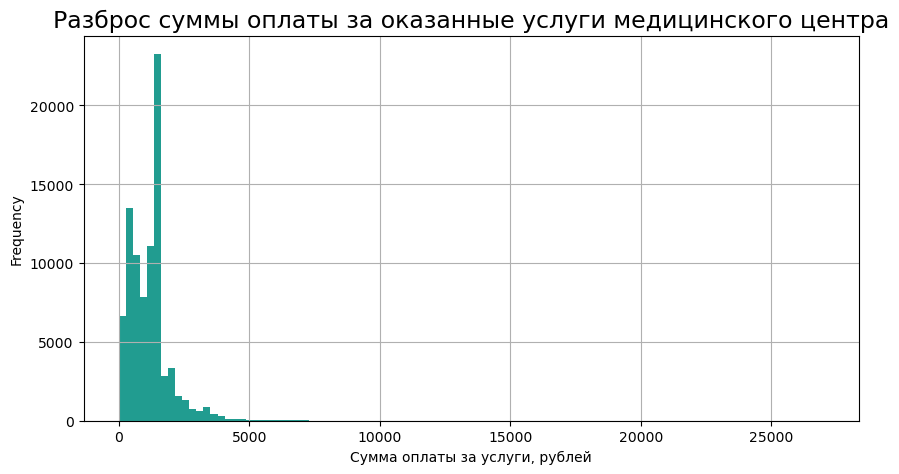

In [19]:
plt.xlabel("Сумма оплаты за услуги, рублей")
plt.title('Разброс суммы оплаты за оказанные услуги медицинского центра', fontsize=17)
(data['service_amount']).plot(kind='hist', bins=100, range=(0, 27000), figsize = (10,5), grid=True, color=color_2)

In [20]:
data[data['service_amount']>10000]

record_id service_date  \
8316   30620826503   2021-04-13   
15588  30961493203   2021-06-17   
16373  30961571703   2021-06-06   
16564  30961590803   2021-06-06   
18518  30961787003   2021-06-24   
18519  30961787103   2021-06-24   
23794  31249334503   2021-08-20   
27994  31408821503   2021-09-09   
36348  31680600903   2021-11-07   
36760  31680642403   2021-11-20   
37286  31680697303   2021-11-10   
83450  33177813203   2022-08-26   
83457  33177813903   2022-08-25   

                                            service_name  service_amount  \
8316   МСКТ почек и надпочечников с внутривенным болю...           11025   
15588  МРТ брюшной полости и забрюшинного пространств...           17325   
16373  МСКТ мочевыделительной системы с внутривенным ...           12075   
16564            Вскрытие абсцесса различной локализации           12810   
18518  Тотальная внутривенная анестезия от 20 минут д...           11550   
18519             гистерорезектоскопия при полипах , РДВ           26999   
23794  МРТ головного мозга и гипофиза с контрастирова...           15225   
27994  Мультипараметрическая МРТ предстательной желез...           14175   
36348  МСКТ органов брюшной полости и забрюшинного пр...           12680   
36760  МСКТ органов брюшной полости и забрюшинного пр...           12680   
37286  МРТ органов малого таза с внутривенным контрас...           13780   
83450                              МРТ коленного сустава           13000   
83457                  Вскрытие абсцедирующего фурункула           11200   

       service_number  insured  sex_id  age_for_service_date  
8316                1   544444    1.00                    31  
15588               1   634755    1.00                    41  
16373               1   634765    1.00                    42  
16564               2   181718    2.00                    34  
18518               1   362928    2.00                    51  
18519               1   362928    2.00                    51  
23794               1   544627    2.00                    34  
27994               1   531654    1.00                    59  
36348               1   716141    2.00                    31  
36760               1   743829    1.00                    42  
37286               1   596539    2.00                    27  
83450               2  1306792    2.00                    27  
83457               2  1302507    2.00                    33

Все суммы оплаты более 10 000,00 рублей идут за более чем одну услугу или на дорогостоящею процедуру. Ошибок в данных не выявленно.

Проверим данне по возрасту пациентов:

In [21]:
data['age_for_service_date'].describe()

count   85,369.00
mean        33.85
std         12.14
min          0.00
25%         27.00
50%         34.00
75%         41.00
max         83.00
Name: age_for_service_date, dtype: float64

In [22]:
data[data['age_for_service_date']==0] # посмотрим на пациентов с возрастом 0

record_id service_date                             service_name  \
116    30268168603   2021-01-20                          Прием повторный   
117    30268168703   2021-01-03                          Прием повторный   
118    30268168803   2021-01-08                          Прием повторный   
127    30268169703   2021-01-04                          Прием первичный   
128    30268169803   2021-01-06                        Общий анализ мочи   
...            ...          ...                                      ...   
80057  32978891803   2022-07-16   Прием травматолога-ортопеда, повторный   
85341  33178144403   2022-08-09           Вакцинация вакциной "Менактра"   
85342  33178144503   2022-08-09  Консультация педиатра перед вакцинацией   
85343  33178144603   2022-08-13  Консультация педиатра перед вакцинацией   
85344  33178144703   2022-08-13          Вакцинация вакциной "Варилрикс"   

       service_amount  service_number  insured  sex_id  age_for_service_date  
116              1313               1   246934    2.00                     0  
117              1313               1   246935    2.00                     0  
118              1313               1   246935    2.00                     0  
127              1470               1   221630    1.00                     0  
128               431               1   221630    1.00                     0  
...               ...             ...      ...     ...                   ...  
80057            1450               1  1155016    1.00                     0  
85341            9000               1  1155165    2.00                     0  
85342            1230               1  1155165    2.00                     0  
85343            1230               1  1155165    2.00                     0  
85344            4600               1  1155165    2.00                     0  

[402 rows x 8 columns]

Судя по разбросу данных по возрасту - анамалий не наблюдается, однако есть записи без указания возраста. Попробуем проставить возраст по номеру пациентов

In [23]:
data.loc[data['age_for_service_date']==0, 'insured'].unique()

array([ 246934,  246935,  221630,  490546,  512434,  490578,  544870,
        544909,  544733,  596522,  596587,  497248,  652021,  636158,
        698625,  698621,  655738,  716157,  822629,  822681,  822704,
        842394,  842395,  873339,  856951,  935463, 1155016, 1154921,
       1155163, 1155165, 1217375], dtype=int64)

In [24]:
data.loc[data['insured']==246934, 'age_for_service_date']

116      0
7549     0
7550     0
7551     0
12350    1
12351    1
12352    1
12353    1
12354    1
12355    1
12356    1
28932    1
Name: age_for_service_date, dtype: int64

В части случаев значение 0 постепенно переходит в единицу, так что можно предположить, что это дети до года и ошибки в данных нет.

Проверим данные по количеству услуг

In [25]:
data['service_number'].describe()

count   85,369.00
mean         1.02
std          0.23
min          1.00
25%          1.00
50%          1.00
75%          1.00
max         16.00
Name: service_number, dtype: float64

<Axes: title={'center': 'Разброс количества оказанных услуг'}, xlabel='Количесто услуг, шт', ylabel='Frequency'>

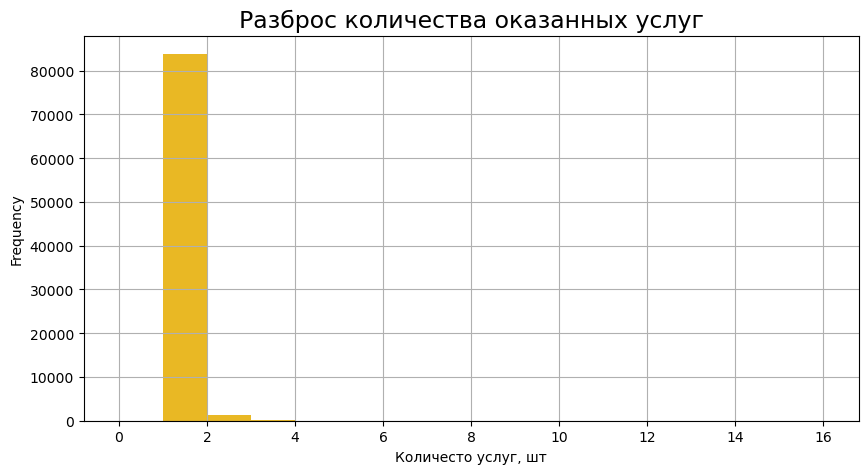

In [26]:
plt.xlabel("Количесто услуг, шт")
plt.title('Разброс количества оказанных услуг', fontsize=17)
(data['service_number']).plot(kind='hist', bins=16, range=(0, 16), figsize = (10,5), grid=True, color=color_1)

In [27]:
data.loc[data['service_number']>4]

record_id service_date  \
9050   30620900003   2021-04-03   
11397  30621135403   2021-04-13   
11398  30621135503   2021-04-13   
11399  30621135603   2021-04-13   
11425  30621138203   2021-04-13   
12519  30786052903   2021-05-01   
12618  30786062803   2021-05-15   
14404  30786241403   2021-05-15   
15303  30786331303   2021-05-03   
22336  31112034403   2021-07-02   
28454  31408868003   2021-09-01   
31349  31485597303   2021-10-26   
33344  31485798003   2021-10-29   
36121  31680577603   2021-11-03   
36313  31680597403   2021-11-20   
36853  31680651703   2021-11-02   
37567  31680727103   2021-11-25   
43678  31814231903   2021-12-07   
43755  31814239903   2021-12-10   
48871  32112436003   2022-02-05   
54055  32326845703   2022-03-19   
58060  32327252803   2022-03-24   
60791  32510836203   2022-04-30   
63295  32511089303   2022-04-30   
69049  32631559703   2022-05-05   
72775  32800999303   2022-06-17   
73042  32801029203   2022-06-25   
83447  33177812903   2022-08-25   

                                            service_name  service_amount  \
9050        Постановка кожных аллергопроб (за 1 единицу)            2772   
11397  Взятие материала для цитологического исследования            1420   
11398  Пункция молочной железы, опухолей кожи, лимфоу...            6930   
11399      Исследование пунктатов молочной железы и кожи            4045   
11425                         УЗИ - контроль при пункции            4410   
12519       Постановка кожных аллергопроб (за 1 единицу)            2541   
12618       Постановка кожных аллергопроб (за 1 единицу)            3003   
14404       Постановка кожных аллергопроб (за 1 единицу)            3003   
15303                                       Взятие мазка            1705   
22336                                       Взятие мазка            1705   
28454                                       Взятие мазка            1705   
31349       Постановка кожных аллергопроб (за 1 единицу)            1680   
33344       Постановка кожных аллергопроб (за 1 единицу)            1440   
36121                                       Взятие мазка            1800   
36313       Постановка кожных аллергопроб (за 1 единицу)            3840   
36853       Постановка кожных аллергопроб (за 1 единицу)            1680   
37567       Постановка кожных аллергопроб (за 1 единицу)            3840   
43678                                       Взятие мазка            1800   
43755       Постановка кожных аллергопроб (за 1 единицу)            1680   
48871       Постановка кожных аллергопроб (за 1 единицу)            3600   
54055       Постановка кожных аллергопроб (за 1 единицу)            1680   
58060       Постановка кожных аллергопроб (за 1 единицу)            3120   
60791       Постановка кожных аллергопроб (за 1 единицу)            1200   
63295       Постановка кожных аллергопроб (за 1 единицу)            3120   
69049       Постановка кожных аллергопроб (за 1 единицу)            3120   
72775       Постановка кожных аллергопроб (за 1 единицу)            2880   
73042       Постановка кожных аллергопроб (за 1 единицу)            3360   
83447       Постановка кожных аллергопроб (за 1 единицу)            3640   

       service_number  insured  sex_id  age_for_service_date  
9050               12   512453    1.00                    29  
11397               5   243315    2.00                    40  
11398               5   243315    2.00                    40  
11399               5   243315    2.00                    40  
11425               5   243315    2.00                    40  
12519              11   512572    2.00                    35  
12618              13   363075    2.00                    34  
14404              13   596505    1.00                    33  
15303               5   243393    2.00                    40  
22336               5   490584    2.00                    16  
28454               5   680882    2.00                    31  
31349               7   716050  

Аномалий в данных не выявленно.

In [28]:
data['service_date'].min()

Timestamp('2021-01-03 00:00:00')

In [29]:
data['service_date'].max()

Timestamp('2022-08-31 00:00:00')

Данные предоставлены за 12 месяцев 2021 и 8 месяцев 2022. 

### 2.5. Обогощение данных

По описанию услуги в поле `service_name` добавим два дополнительных столбца с категориями:
* Прием врача / анализ - `type_of_service`
* Вид анализ или приема - `type_of_sub_service`

In [30]:
#До категоризации приведем все названия услуг к нижнему регистру
data['service_name'] = data['service_name'].str.lower()

In [31]:
# Напишим функции для категорий возраста пациента (разбитие по возрастным категориям на основе классификации ВОЗ)

def category_type_of_age(row):
    if row['age_for_service_date'] < 7:
        return '1.Дошкольники - 0-6 лет'
    elif row['age_for_service_date'] < 18:
        return '2.Школьники - 7-17 лет'
    elif row['age_for_service_date'] < 45:
        return '3.Молодые люди - 18-44 года'
    elif row['age_for_service_date'] < 60:
        return '4.Люди среднего возраста - 45-59 лет'
    elif row['age_for_service_date'] < 75:
        return '5.Люди пожилого возраста - 60-74 лет'
    elif row['age_for_service_date'] < 90:
        return '6.Старые люди - 75-90 лет'
    else:
        return '7.Долгожители - старше 90 лет' 


In [32]:
# Напишим функции для категорий услуг
def category_type_of_service(row):
    if 'прием' in row['service_name'] :
        return 'Прием врача'
    elif 'консультация' in row['service_name'] :
        return 'Прием врача'
    else:
        return 'Анализ / Процедура' 

In [33]:
def category_type_of_sub_service(row):
    if 'повторный' in row['service_name']:
        return 'Повторный прием'
    else:
        return 'Первичный прием'

In [34]:
# Посмотрим количество уникальных названий услуги
data['service_name'].nunique()

835

In [35]:
classification = {
                 'Массаж': ['массаж', 'мануальная терапия', 'рефлексотерап'],
                 'Аппаратное исследование': ['узи', 'ультразвуковое', 'мрт','мскт','дуплексное сканирование', 'электронейромиография', 'экг', 'эхоэнцефалография', 'нейросонография', 'ээг', 'ктг', 'цифровая дерматоскопия'],
                 'Перевязки': ['повязки', 'гипс', 'наложение', 'снятие', 'перевязка', 'шинирование', 'компресса'],
                 'Рентген': ['рентгенография'],
                 'Вакцинаци / Инъекции': ['вакцинаци', 'инъекц'],
                 'Аппаратные процедуры': ['магнитотерапия', 'увч-терапия', 'интерференционные токи', 'фонофорез', 'лазеротерапия', 'sis', 'волновая терапия', 'ярило-синхро', 'физиотерапия', 'уз-терапия','электромиостимуляция', 'электростимуляция','светотерапия','диадинамические', 'смт-форез', 'электрофорез', 'куф - терапия', 'ингаляция', 'сеанс уфо'],
                 'Лечебные процедуры': ['смазывание', 'обработка', 'промывание', 'лекарственных', 'лекарственные', 'анестезия', 'хирург', 'удаление', 'вскрытие', 'репозиция', 'лекарственного', 'блокада', 'прижигание', 'продувание', 'пункция', 'введение', 'вливание', 'туширование', 'аппликация', 'небулайзеротерапия', 'лфк разовое групповое занятие'],       
                 'Коронавирус': ['коронавирус'],    
                 'Диагностика': ['эластотонометрия', 'эндоскопия', 'экспресс', 'тест', 'исследование','пульсоксиметрия', 'рефрактометрия', 'флороценоз', 'гемостазиограмма', 'скопия', 'аудиометрия', 'спирография', 'риноцитограмма', 'урофлуометрия', 'расшифровка', 'зондирование'],    
                 'Прочее': ['функция внешнего дыхания', 'контрольный осмотр', 'туалет', 'эндоскопическая визуализация', 'вестибулярные маневры', 'катетер','глаз', 'очков', 'зрения','ночное респираторное мониторирование', 'подбор срар терапии', 'пренатальный скрининг', 'пребывание в палате','доплерометрия','диагностическая аспирация сустава', 'типирование']
}

In [36]:
def category_type_of_sub_service_classification(purpose):
    for category, items_list in classification.items():
        for item in items_list:
            if item in purpose:
                return category
    return 'Анализ'

In [37]:
# Заполним категории
data['type_of_service'] = data.apply(category_type_of_service, axis=1)
data['type_of_sub_service'] = data['service_name'].apply(category_type_of_sub_service_classification)
data.loc[data['type_of_service']=='Прием врача','type_of_sub_service'] = data.apply(category_type_of_sub_service, axis=1)
data['type_of_age'] = data.apply(category_type_of_age, axis=1)

В данных есть информация о стоимости оказаных услуг и о количестве оказаных услуг. Добавим столбец с ценой услуги:

In [38]:
data['price'] = data['service_amount'] /  data['service_number']

Добавим столбцы с годом и месяцем

In [39]:
data['year'] = data['service_date'].dt.year
data['month'] = data['service_date'].dt.month

### 2.6. Выводы предобработки данных

В ходе предобработки было сделано:
* Обработаны пропуски в столбце `sex_id` 
* Явных дубликатов в данных не выявлено. Обработаны неявные дубликаты в столбце `service_name`;
* Столбец `service_date` приведен в формат datetime;
* Проверена корректность данных, аномалий не выявлено.
* Обогащение данных доп. столбцами - 2-е категории услуг, цена услуги, год и месяц

### 2.7. Итоговые данные для анализа

In [40]:
data.head(10)

record_id service_date  \
0  30268157003   2021-01-24   
1  30268157103   2021-01-24   
2  30268157203   2021-01-24   
3  30268157303   2021-01-24   
4  30268157403   2021-01-24   
5  30268157503   2021-01-24   
6  30268157603   2021-01-24   
7  30268157703   2021-01-26   
8  30268157803   2021-01-26   
9  30268157903   2021-01-26   

                                        service_name  service_amount  \
0                                    прием первичный            1470   
1  взятие материала на посев, цитологическое иссл...             284   
2  посев отдел, дыхательных путей - слизистая зев...            1134   
3      общий анализ крови (лейкоцитарная форм,, соэ)             693   
4                                ревматоидный фактор             420   
5                                 с-реактивный белок             420   
6                взятие крови из периферической вены             158   
7                                    прием первичный            1470   
8                           магнитотерапия (1 сеанс)            1040   
9                     увч-терапия (1 сеанс) (1 поле)            1040   

   service_number  insured  sex_id  age_for_service_date     type_of_service  \
0               1   490777    2.00                    26         Прием врача   
1               1   490777    2.00                    26  Анализ / Процедура   
2               1   490777    2.00                    26  Анализ / Процедура   
3               1   490777    2.00                    26  Анализ / Процедура   
4               1   490777    2.00                    26  Анализ / Процедура   
5               1   490777    2.00                    26  Анализ / Процедура   
6               1   490777    2.00                    26  Анализ / Процедура   
7               1   490777    2.00                    26         Прием врача   
8               1   490777    2.00                    26  Анализ / Процедура   
9               1   490777    2.00                    26  Анализ / Процедура   

    type_of_sub_service                  type_of_age    price  year  month  
0       Первичный прием  3.Молодые люди - 18-44 года 1,470.00  2021      1  
1           Диагностика  3.Молодые люди - 18-44 года   284.00  2021      1  
2                Анализ  3.Молодые люди - 18-44 года 1,134.00  2021      1  
3                Анализ  3.Молодые люди - 18-44 года   693.00  2021      1  
4                Анализ  3.Молодые люди - 18-44 года   420.00  2021      1  
5                Анализ  3.Молодые люди - 18-44 года   420.00  2021      1  
6                Анализ  3.Молодые люди - 18-44 года   158.00  2021      1  
7       Первичный прием  3.Молодые люди - 18-44 года 1,470.00  2021      1  
8  Аппаратные процедуры  3.Молодые люди - 18-44 года 1,040.00  2021      1  
9  Аппаратные процедуры  3.Молодые люди - 18-44 года 1,040.00  2021      1

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   record_id             85369 non-null  int64         
 1   service_date          85369 non-null  datetime64[ns]
 2   service_name          85369 non-null  object        
 3   service_amount        85369 non-null  int64         
 4   service_number        85369 non-null  int64         
 5   insured               85369 non-null  int64         
 6   sex_id                85365 non-null  float64       
 7   age_for_service_date  85369 non-null  int64         
 8   type_of_service       85369 non-null  object        
 9   type_of_sub_service   85369 non-null  object        
 10  type_of_age           85369 non-null  object        
 11  price                 85369 non-null  float64       
 12  year                  85369 non-null  int64         
 13  month           

## 3. Анализ тенденций основных покателей (выручки и количества оказанных услуг)

Цель анализа вывявить драйверы рост выручки от услуг в 2022 году по сравнению с 2021. В виду отсутствия части данных за 2022 год, сравнивать в целом по годам не корректно. Будем сравнивать данные по месячно для исключения факторов отсутствия данных и сезоности заболеваний.

In [42]:
# Функция для среза и анализа данных
def data_slice (info, agf):
    info = info.pivot_table(index='month', columns='year', values='service_amount', aggfunc=agf)
    info.columns = ['2021', '2022']
    # Посчитаем разницу к предыдущему году
    info['difference_year'] = info['2022'] - info['2021']
    # Посчитаем разницу к предыдущему месяцу для 2022 года
    for i in info.index:
        if i ==1:
            info.at[i,'difference_month'] = info.at[i,'2022'] -  info.at[12,'2021']
        else:
            info.at[i,'difference_month'] = info.at[i,'2022'] -  info.at[i-1,'2022']
    # Посчитаем процент изменения к предыдущему году
    info['percent_year'] = info['difference_year'] / info['2021'] * 100
    # Посчитаем процент изменения к предыдущему месяцу
    for i in info.index:
        if i ==1:
            info.at[i,'percent_month'] = info.at[i,'difference_month'] /  info.at[12,'2021']* 100
        else:
            info.at[i,'percent_month'] = info.at[i,'difference_month'] /  info.at[i-1,'2022']* 100
    return info

Посмотрим на тендеции по выручке

In [43]:
sum_service_amount = data_slice(data, 'sum')
sum_service_amount

2021         2022  difference_year  difference_month  \
month                                                                
1     2,265,931.00 4,800,320.00     2,534,389.00       -210,030.00   
2     2,379,125.00 5,298,235.00     2,919,110.00        497,915.00   
3     3,927,248.00 6,451,060.00     2,523,812.00      1,152,825.00   
4     4,380,487.00 8,035,080.00     3,654,593.00      1,584,020.00   
5     4,298,978.00 7,588,110.00     3,289,132.00       -446,970.00   
6     4,522,585.00 6,879,580.00     2,356,995.00       -708,530.00   
7     3,872,209.00 6,216,498.00     2,344,289.00       -663,082.00   
8     4,310,989.00 3,717,779.00      -593,210.00     -2,498,719.00   
9     4,782,859.00          NaN              NaN               NaN   
10    6,063,580.00          NaN              NaN               NaN   
11    4,747,330.00          NaN              NaN               NaN   
12    5,010,350.00          NaN              NaN               NaN   

       percent_year  percent_month  
month                               
1            111.85          -4.19  
2            122.70          10.37  
3             64.26          21.76  
4             83.43          24.55  
5             76.51          -5.56  
6             52.12          -9.34  
7             60.54          -9.64  
8            -13.76         -40.19  
9               NaN            NaN  
10              NaN            NaN  
11              NaN            NaN  
12              NaN            NaN

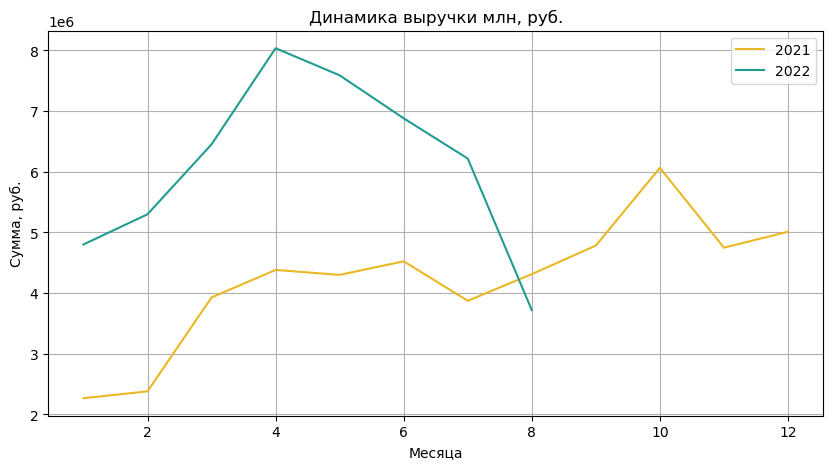

In [44]:
sum_service_amount[['2021','2022']].plot(kind='line', grid=True, ylabel='Сумма, руб.', xlabel='Месяца', title='Динамика выручки млн, руб.', \
                         figsize = (10,5), color={'2021': color_1, '2022': color_2})
plt.legend(['2021', '2022'], bbox_to_anchor=(1,1))

Из данных видно, что в 2022 году по сравнению с 2021 оборот мединционского центра значительно увеличился. В соопостовимые месяцы каждого года наблюдается более чем 50% прирост выручки от оказываемых услуг. Если смотреть от месяца к месяцу в 2022 году:
* В январе по сравнению с декабрем наблюдается снижение на 4,19%, что не удивительно, так как почти 3 месяц - праздничные дни.
* С февраля по апрель начинается стабильный рост и в апреле была максимальная выручка в размере 8 035 080,00 рублей. 
* С мая 2022 наблюдается падение выручки от месяца к месяцу, но так как по сравнению с 2021 годом выручка растет, возможно имеет место сезонный фактор.
* В августе 2022 резкое снижение на 40,19%  - по сравнению с июлем 2022 и на 13,76%  - по сравнению с августом 2021


Посмотрим на тендеции по количеству оказываемых услуг

In [45]:
count_service_amount = data_slice(data, 'count')
count_service_amount

2021     2022  difference_year  difference_month  percent_year  \
month                                                                      
1     2,021.00 4,143.00         2,122.00           -145.00        105.00   
2     2,120.00 4,586.00         2,466.00            443.00        116.32   
3     3,696.00 5,547.00         1,851.00            961.00         50.08   
4     3,869.00 6,692.00         2,823.00          1,145.00         72.96   
5     3,788.00 6,374.00         2,586.00           -318.00         68.27   
6     3,915.00 5,765.00         1,850.00           -609.00         47.25   
7     3,545.00 4,841.00         1,296.00           -924.00         36.56   
8     3,782.00 3,029.00          -753.00         -1,812.00        -19.91   
9     4,229.00      NaN              NaN               NaN           NaN   
10    5,065.00      NaN              NaN               NaN           NaN   
11    4,074.00      NaN              NaN               NaN           NaN   
12    4,288.00      NaN              NaN               NaN           NaN   

       percent_month  
month                 
1              -3.38  
2              10.69  
3              20.96  
4              20.64  
5              -4.75  
6              -9.55  
7             -16.03  
8             -37.43  
9                NaN  
10               NaN  
11               NaN  
12               NaN

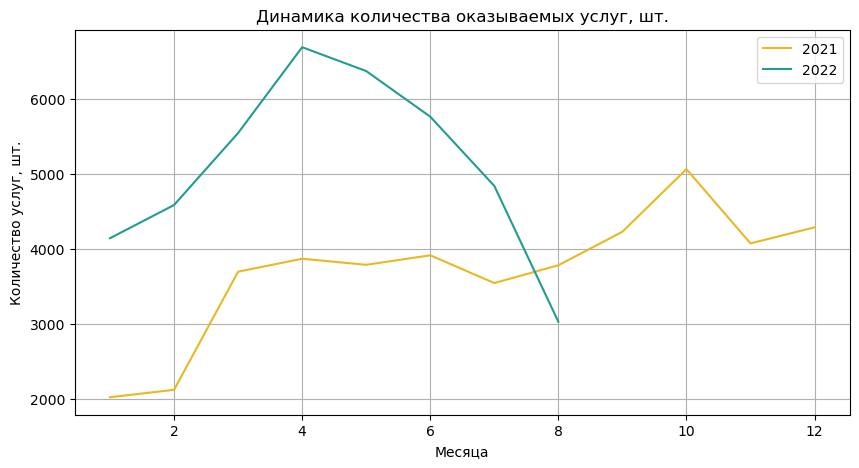

In [46]:
count_service_amount[['2021','2022']].plot(kind='line', grid=True, ylabel='Количество услуг, шт.', xlabel='Месяца', title='Динамика количества оказываемых услуг, шт.', \
                         figsize = (10,5), color={'2021': color_1, '2022': color_2})
plt.legend(['2021', '2022'], bbox_to_anchor=(1,1))

Если смотреть на данные по количеству, то наблюдается точно такие же тенденции, только менее выраженные по росту и более выраженные по падению. Что говорит о том, что сказывается фактор роста цен услуг.


### 3.1 Динамика в разрезе категорий

Посмотрим на данные показатели в разрезе категорий

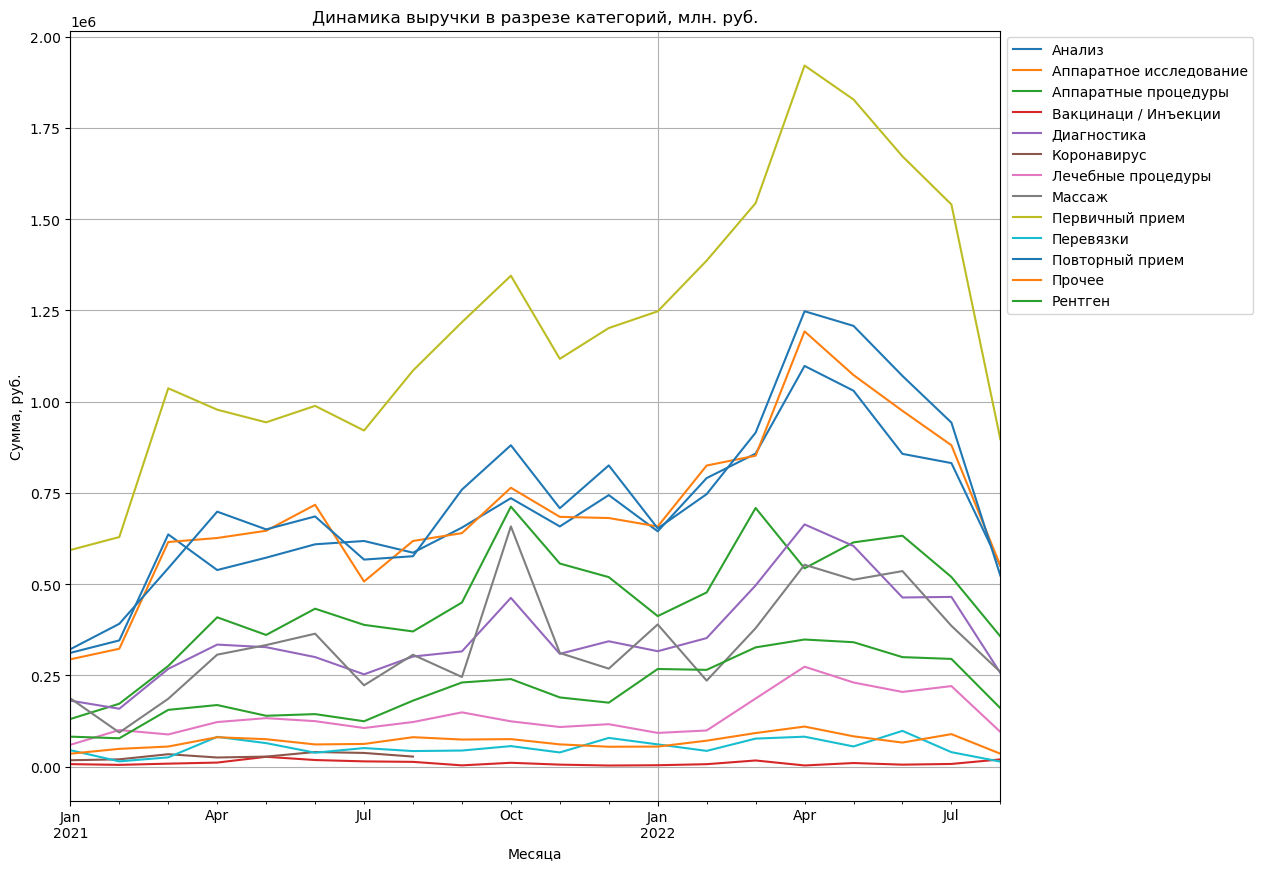

In [47]:
data['data_s'] = data['service_date'].to_numpy().astype('datetime64[M]')
(data
 .pivot_table(index='data_s', columns='type_of_sub_service', values='service_amount', aggfunc='sum')
 .plot(kind='line', grid=True, ylabel='Сумма, руб.', xlabel='Месяца', title='Динамика выручки в разрезе категорий, млн. руб.', \
                         figsize = (12,10)))
plt.legend( bbox_to_anchor=(1,1))


Рост выручки в с февраля по апрель 2022 года связано со следующими категориями:
1. Первичный прием - самая прибыльная категория
2. Анализ
3. Аппаратное исследование
4. Повторный прием

С апреля падение выручки происходит практически по все категориям и в особенности по выше указанными, где падение самое максимальное.

Так же видно, что услуги, связанные с короновирусом были актуальны по август 2022, но выручка по ним была не значительная и их уход не сильно сказался на общей выручке.

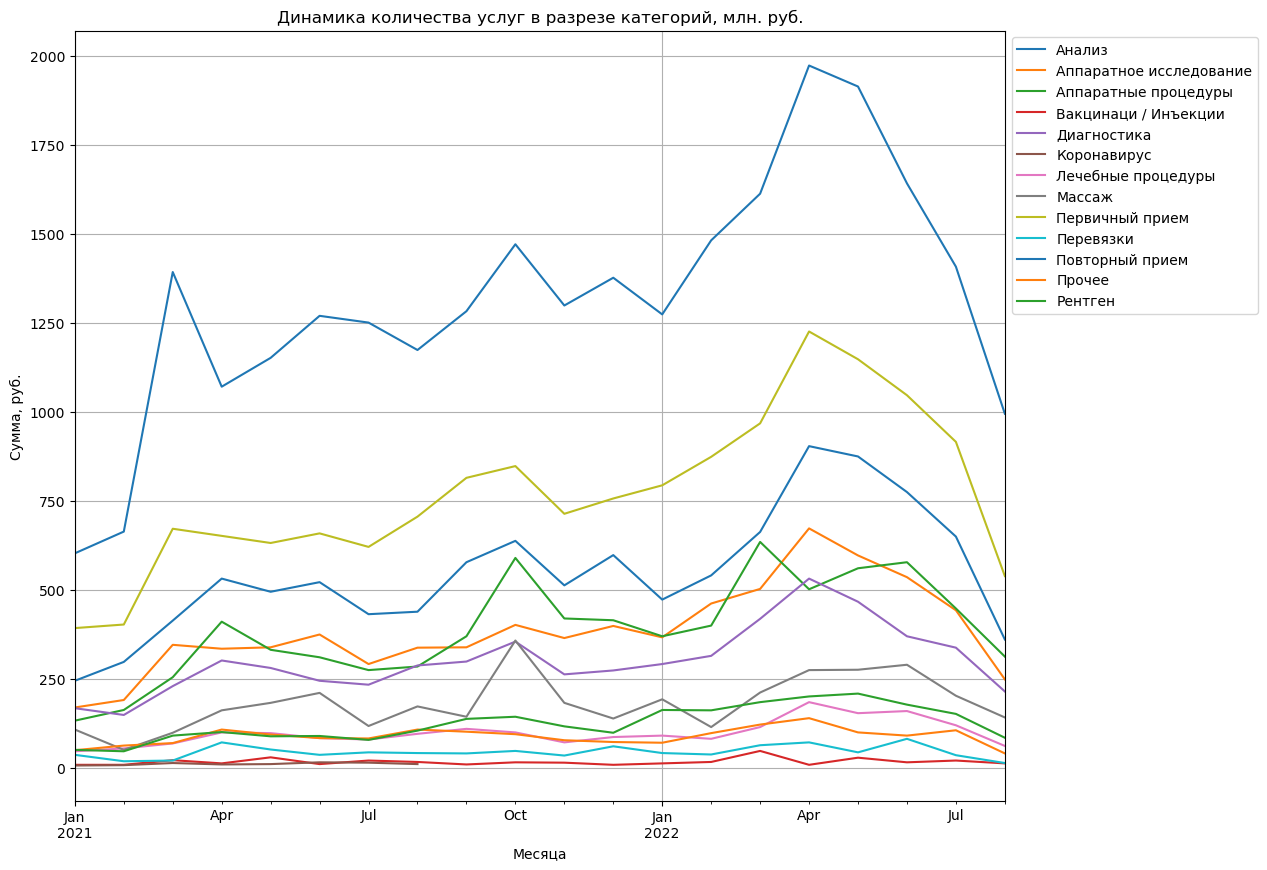

In [48]:
(data
 .pivot_table(index='data_s', columns='type_of_sub_service', values='service_amount', aggfunc='count')
 .plot(kind='line', grid=True, ylabel='Сумма, руб.', xlabel='Месяца', title='Динамика количества услуг в разрезе категорий, млн. руб.', \
                         figsize = (12,10)))
plt.legend( bbox_to_anchor=(1,1))

Рост количества оказываемых услуг в с февраля по апрель 2022 года связано со следующими категориями:
1. Анализ - наибольшее количество
2. Первичный прием 
3. Повторный прием

С апреля падение количества происходит практически по все категориям и в особенности по выше указанными, где падение самое максимальное.

## 4. Изменение цен на услуги

Из анализа тенденций выручки и количества оказанных услуг видно, что фактор увеличения цены имел место быть. Для понимания процента и периода изменения посмотрим таблицу изменения цены в разрезе каждой услуги. Для упрощения будем считать, что цена меняется с начала месяца.

In [49]:
# Создадим сводную таблицу по средней цене в каждом месяце
price = data.pivot_table(index='service_name', columns=('year', 'month'), values='price', aggfunc='mean')
price.columns = ['2021_1','2021_2','2021_3','2021_4','2021_5','2021_6','2021_7','2021_8','2021_9','2021_10','2021_11','2021_12', '2022_1', '2022_2', '2022_3', '2022_4', '2022_5', '2022_6', '2022_7', '2022_8']      
# заполним пустые значения на основе предыдущих и последующих значений
for item in price:
    if item == '2021_1':
        i= item
        continue
    else:
        price.loc[price[item].isna(), item] = price.loc[price[item].isna(), i]
        i = item
        
price = price.iloc[:, ::-1]
for item in price:
    if item == '2022_8':
        i= item
        continue
    else:
        price.loc[price[item].isna(), item] = price.loc[price[item].isna(), i]
        price.loc[price[i].isna(), i] = price.loc[price[i].isna(), item]
        i = item 



In [50]:
# создадим таблицу соотношения цен текущего месяца к предыдущему
price_dynamics = pd.DataFrame() 
for item in price:
    if item == '2022_8':
        i= item
        continue
    else:
        price_dynamics[i] = round(price[i] / price[item],2)
        i= item
price_dynamics = price_dynamics.iloc[:, ::-1]
price = price.iloc[:, ::-1]

In [51]:
price_dynamics_all = price_dynamics.mean()
price_dynamics_all

2021_2    1.00
2021_3    1.00
2021_4    1.00
2021_5    1.00
2021_6    1.00
2021_7    1.00
2021_8    1.00
2021_9    1.00
2021_10   1.02
2021_11   1.00
2021_12   1.00
2022_1    1.00
2022_2    1.00
2022_3    1.00
2022_4    1.00
2022_5    1.00
2022_6    1.00
2022_7    1.03
2022_8    1.00
dtype: float64

Изменений цены в сторону увеличения было в октябре 2021 и в июле 2022. Посмотрим на перечень услуг по корому проводилось увеличение и на сколько. 


**Октябрь 2021**

In [52]:
# Обнулим индексы, чтоб в вырезки попало название услуг
price_dynamics.reset_index(inplace= True) 

In [53]:
# Выделим услуги, по которым проходило изменение в 10-2021
price_2021_10 = price_dynamics.loc[price_dynamics['2021_10']>1., ('service_name','2021_10')]
# добавим данные о карегориях и подкатегориях
price_2021_10 = price_2021_10.merge(data[['service_name', 'type_of_service', 'type_of_sub_service']].drop_duplicates(), on='service_name', how='left')
price_2021_10['service_name'].count()

309

In [54]:
# На сколько увеличивалась цена
price_2021_10['2021_10'].unique()

array([1.05, 1.06, 1.04, 1.03, 1.08, 1.02, 1.34])

In [55]:
# Увеличение цены в разрезе категорий и подкатегорий
price_2021_10.groupby(['type_of_service', 'type_of_sub_service']).agg({'service_name': 'count', '2021_10': 'mean'})

service_name  2021_10
type_of_service    type_of_sub_service                           
Анализ / Процедура Анализ                            125     1.05
                   Аппаратное исследование            41     1.05
                   Аппаратные процедуры               12     1.05
                   Вакцинаци / Инъекции                4     1.05
                   Диагностика                        40     1.05
                   Лечебные процедуры                 24     1.05
                   Массаж                             13     1.05
                   Перевязки                          12     1.05
                   Прочее                             10     1.05
                   Рентген                            18     1.05
Прием врача        Первичный прием                     7     1.09
                   Повторный прием                     3     1.05

In [56]:
# Топ-5 увеличений цены
price_2021_10.sort_values(by='2021_10', ascending=False).head(5)

service_name  2021_10     type_of_service  \
182            прием ведущего специалиста     1.34         Прием врача   
44    взятие крови из периферической вены     1.08  Анализ / Процедура   
203                       пульсоксиметрия     1.08  Анализ / Процедура   
230                        риноцитограмма     1.06  Анализ / Процедура   
199  промывание слезных путей (один глаз)     1.06  Анализ / Процедура   

    type_of_sub_service  
182     Первичный прием  
44               Анализ  
203         Диагностика  
230         Диагностика  
199  Лечебные процедуры

В октябре 2021 цена увеличилась по 309 услугам на в диапозоне от 2 до 34%. 

Увеличение в среднем проводилось по всем категоряим на 5%. За исключением приема врача - 9%. Основным фактором роста стоиомости услуги приема врача является зарплата сотрудника.

Самое высокое изменение цены было по "прием ведущего специалиста" на 34%. 

**Июль 2022**

In [57]:
# Выделим услуги, по которым проходило изменение в 7-2022
price_2022_7 = price_dynamics.loc[price_dynamics['2022_7']>1., ('service_name','2022_7')]
# добавим данные о карегориях и подкатегориях
price_2022_7 = price_2022_7.merge(data[['service_name', 'type_of_service', 'type_of_sub_service']].drop_duplicates(), on='service_name', how='left')
price_2022_7['service_name'].count()

306

In [58]:
# На сколько увеличивалась цена
price_2022_7['2022_7'].unique()

array([1.1 , 1.15, 1.14, 1.03, 1.09, 1.04, 1.06, 1.05, 1.02, 1.12, 1.07,
       1.01, 1.08, 2.03])

In [59]:
# Увеличение цены в разрезе категорий и подкатегорий
price_2022_7.groupby(['type_of_service', 'type_of_sub_service']).agg({'service_name': 'count', '2022_7': 'mean'})

service_name  2022_7
type_of_service    type_of_sub_service                          
Анализ / Процедура Анализ                            106    1.08
                   Аппаратное исследование            28    1.10
                   Аппаратные процедуры               12    1.04
                   Вакцинаци / Инъекции                1    1.10
                   Диагностика                        34    1.09
                   Лечебные процедуры                 29    1.12
                   Массаж                             11    1.04
                   Перевязки                           9    1.09
                   Прочее                             12    1.09
                   Рентген                            15    1.10
Прием врача        Первичный прием                    28    1.05
                   Повторный прием                    21    1.05

In [60]:
# Топ-5 увеличений цены
price_2022_7.sort_values(by='2022_7', ascending=False).head(5)

service_name  2022_7  \
267  удаление кожных образований (хирургическим путем)    2.03   
2                             chlamydia pneumoniae igg    1.15   
271  ультразвуковое исследование большие сроки бере...    1.15   
10                            ureaplasma spp, (соскоб)    1.14   
55      дуплексное сканирование вен нижних конечностей    1.12   

        type_of_service      type_of_sub_service  
267  Анализ / Процедура       Лечебные процедуры  
2    Анализ / Процедура                   Анализ  
271  Анализ / Процедура  Аппаратное исследование  
10   Анализ / Процедура                   Анализ  
55   Анализ / Процедура  Аппаратное исследование

В июле 2022 цена увеличилась по 306 услугам на в диапозоне от 1 до 103%.

В отличии от октябрьского роста цены выросли неравномерно. Больше всего выросли категории, которые зависят от сырья и меньше - зависящие от зарплаты сотрудников.

Самое высокое изменение цены было по "удаление кожных образований (хирургическим путем)" на 103%. 

За исследуемый период было два случая изменения цен на услуги в медицинском центре:
* октябрь 2021
* июль 2022

Если смотреть на динамику прибыли, то в октябре 2021 не было уменьшения выручки по сравнению с предыдущим периодами, наоборот наблюдался рост и после повышения цен наметилась тенденция на уменьшение количества окаываемых услуг. Изменения в этот период коснулись больше анализов и процедур.

В июле 2022 ситуация совершенно другая. С апреля 2022 наблюдается снижение выручки и оказываемых услуг. И изменение цены возможно так же является попыткой остаться прибыльным бизнесом. Так же в этот период пересмотрены цены на приемы врачей.

## 5. Анализ среднего чека пациента

Гипотеза: Вручка изменилась из-за уменьшения среднего чека

Посмотрим на динамику среднего чека пациента за один визит по месяцам:

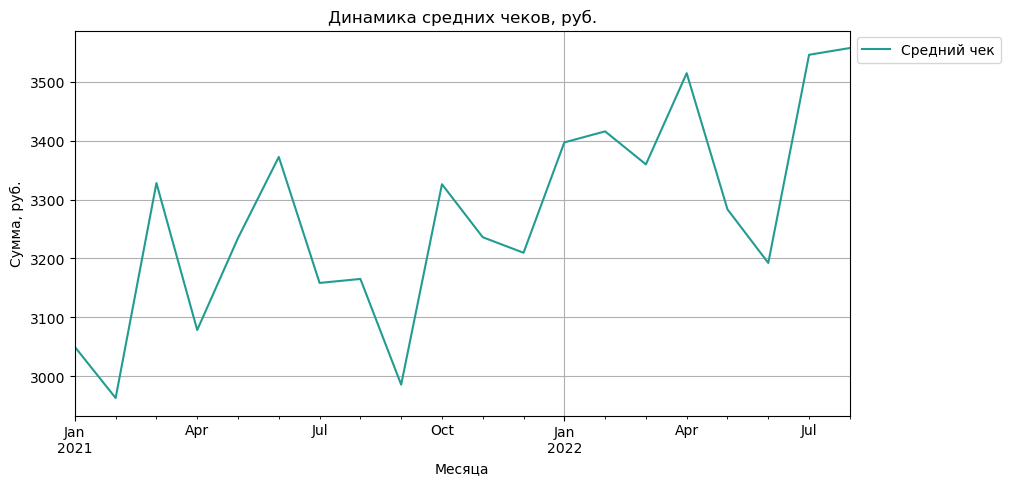

In [61]:
# Сгрупируем данные по пациентам и датам
average_receipt = data.groupby(['insured','service_date']).agg({'service_amount': 'sum'})
average_receipt.reset_index(inplace= True) 
average_receipt['data_s'] = average_receipt['service_date'].to_numpy().astype('datetime64[M]')
# Рассчитаем среднее по месяцам
average_receipt = average_receipt.groupby('data_s').agg({'service_amount': 'mean'})
average_receipt.plot(kind='line', grid=True, ylabel='Сумма, руб.', xlabel='Месяца', title='Динамика средних чеков, руб.', \
                         figsize = (10,5), color={'service_amount': color_2})
plt.legend(['Средний чек'], bbox_to_anchor=(1,1))

Средний чек в челом по медицинскому центру имеет тенденцию к росту, однако он прыгает от месяца к месяцу. Посмотрим на средний чек в разрезе категорий.

In [62]:
# Сгрупируем данные по пациентам и датам
average_receipt = data.groupby(['insured','service_date', 'type_of_sub_service']).agg({'service_amount': 'sum'})
average_receipt.reset_index(inplace= True) 
average_receipt['data_s'] = average_receipt['service_date'].to_numpy().astype('datetime64[M]')
# Рассчитаем среднее по месяцам
average_receipt = average_receipt.pivot_table(index='data_s', columns='type_of_sub_service', values='service_amount', aggfunc='mean')

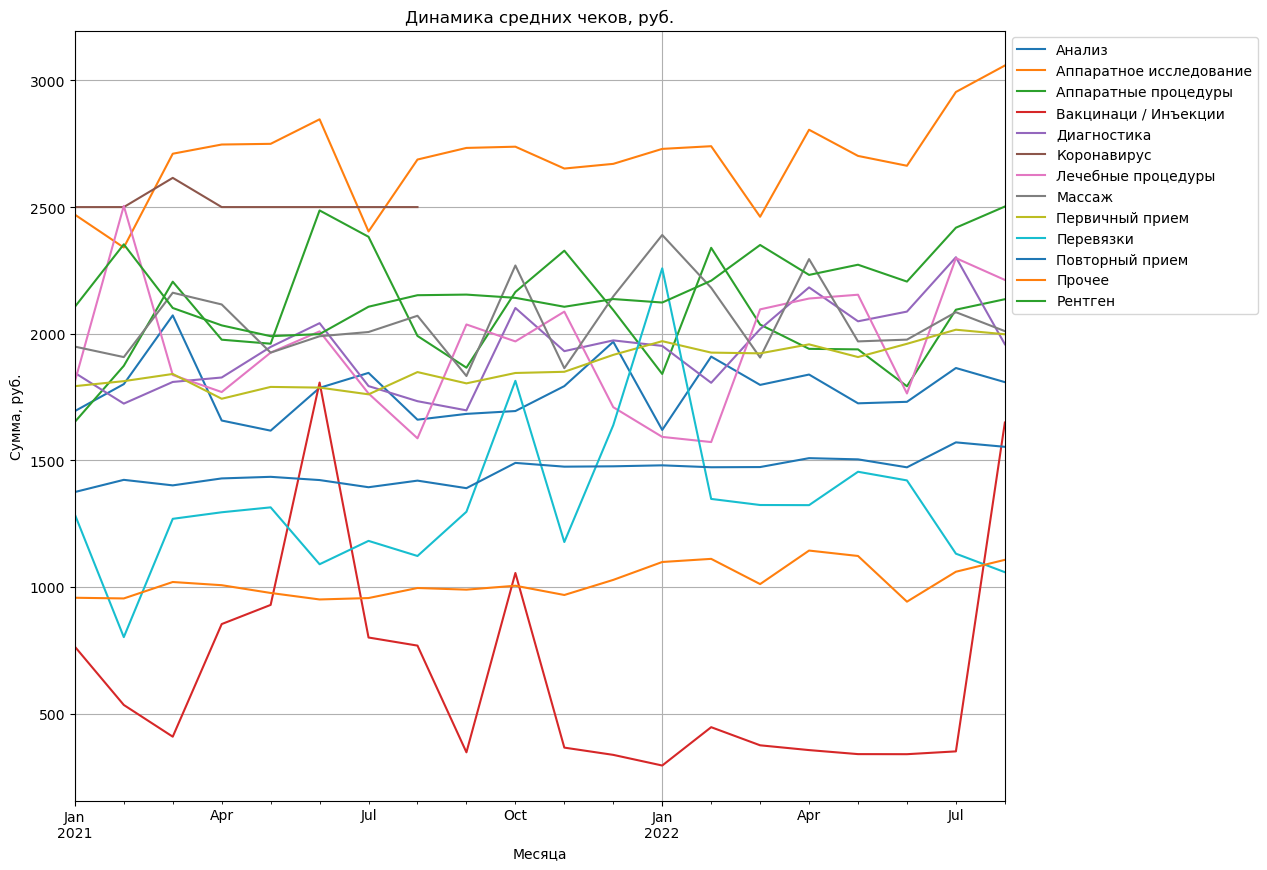

In [63]:
average_receipt.plot(kind='line', grid=True, ylabel='Сумма, руб.', xlabel='Месяца', title='Динамика средних чеков, руб.', \
                         figsize = (12,10))
plt.legend( bbox_to_anchor=(1,1))

1. Аппаратные исследования имеют самый высокий средний чек, так как эта цена услуг по этой категории зависит от сырья и амортизации дорогостоящего оборудования. И по этой категории наблюдается рост среднего чека с мая.
2. Довольно высокий средний чек имели услуги, связанные с короновирусом.
3. Так же довольно высокий чек имеет категория Аппаратные процедуры, которые так же зависят от сырья и амортизации дорогостоящего оборудования. И по этой категории наблюдается рост среднего чека с мая.
4. Удивительны скачки среднего чека по вакцинации, видимо зависит от вида вакцин.
5. Самыми стабильными по среднему чеку являются приемы врачей
6. Перевязки - единственная категория, по которой наблюдается падение среднего чека с июня по август.

## 6. Исследование профилей пациентов

Создадим профили пациентов, содержащих информацию о:
* уникальный идентификатор пациента
* пол пациента
* возраст пациента на дату первого посещения
* дата первого обращения, год и месяц
* первая оказаня услуга
* категория по возрасту на дату первого посещения
* Сумма денег выплаченная медициенскому центру
* Количество посещений медицинского центра за указанный период
* Средний чек за посещение

In [64]:
# функция для создания пользовательских профилей
def get_profiles(sessions):

    # Дублируем столбец с датой чтоб в дальнейшим подсчитать даты прихода 
    sessions['service_date_n'] = sessions['service_date'] 
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['insured', 'service_date'])
        .groupby('insured')
        .agg(
            {
                'service_date': 'first',
                'service_name': 'first',
                'sex_id': 'first',
                'age_for_service_date': 'first',
                'type_of_age': 'first',
                'year': 'first',
                'month': 'first',
                'service_amount': 'sum',
                'service_date_n': 'nunique'
            }
        )
        .rename(columns={'service_date': 'first_ts'})
        .reset_index()
    )
    # посчитаем средний чек
    profiles['average_receipt'] = profiles['service_amount'] /profiles['service_date_n']
    return profiles

profiles = get_profiles(data)
data = data.drop('service_date_n', axis=1) #удалим добавленый столбец для расчета
profiles.head(5)

insured   first_ts                    service_name  sex_id  \
0   125073 2021-01-11                 прием первичный    2.00   
1   125094 2021-01-22                 прием повторный    2.00   
2   125404 2021-08-04                 прием первичный    1.00   
3   139315 2021-12-28  прием офтальмолога,  первичный    1.00   
4   139539 2021-04-15                 прием первичный    2.00   

   age_for_service_date                           type_of_age  year  month  \
0                    65  5.Люди пожилого возраста - 60-74 лет  2021      1   
1                    43           3.Молодые люди - 18-44 года  2021      1   
2                    26           3.Молодые люди - 18-44 года  2021      8   
3                    25           3.Молодые люди - 18-44 года  2021     12   
4                    42           3.Молодые люди - 18-44 года  2021      4   

   service_amount  service_date_n  average_receipt  
0           33080              15         2,205.33  
1           27519               7         3,931.29  
2            1470               1         1,470.00  
3            3300               1         3,300.00  
4           75239              19         3,959.95

В данных выявлено 4 488 уникальных пациента. Посмотрим как часто пациент возращаются в медицинский центр.

In [65]:
profiles['service_date_n'].describe()

count   4,488.00
mean        6.75
std         8.42
min         1.00
25%         1.00
50%         3.00
75%         9.00
max        94.00
Name: service_date_n, dtype: float64

<Axes: title={'center': 'Разброс количества посещений медицинского центра'}, xlabel='Количество посещений, шт', ylabel='Frequency'>

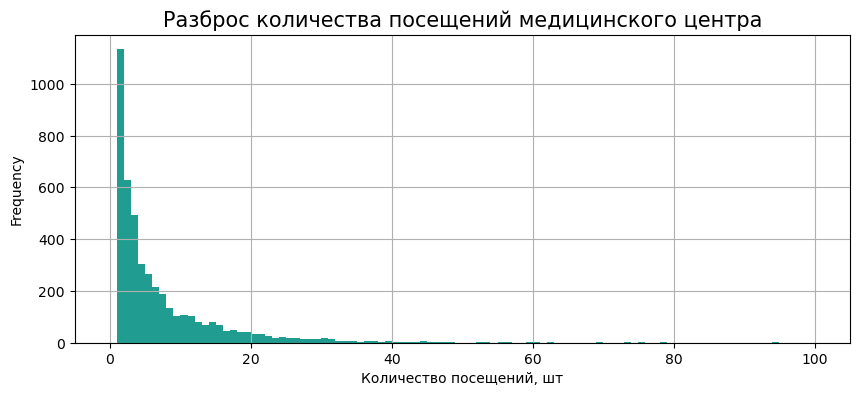

In [66]:
plt.xlabel("Количество посещений, шт")
plt.title('Разброс количества посещений медицинского центра', fontsize=15)
(profiles['service_date_n']).plot(kind='hist', bins=100, range=(0, 100), figsize = (10,4), grid=True, color=color_2)

Большая часть пациентов посещала медицинский центр не более 3 раз.

Разделим на пациентов на две группы:
1. которые посетили медицински
й центр 1 раз
2. которые посещали центр более одного раза. 

и рассмотрим их структуру в разных разрезах. 

Рассмотрим структуру пациентов 1-ой группы (которые посетили медицинский центр 1 раз) по половому признаку пациентов

In [67]:
sex_id_1 = profiles.loc[profiles['service_date_n']==1].pivot_table(index='sex_id', values='insured', aggfunc='count')
sex_id_1['precent'] = sex_id_1['insured'] / profiles.loc[profiles['service_date_n']==1,'insured'].count() * 100
sex_id_1.columns = ['count', 'precent']
sex_id_1

count  precent
sex_id                
1.00      533    47.04
2.00      600    52.96

Рассмотрим структуру пациентов 2-ой группы (которые посещали центр более 1 раза) по половому признаку пациентов

In [68]:
sex_id_2 = profiles.loc[profiles['service_date_n']>1].pivot_table(index='sex_id', values='insured', aggfunc='count')
sex_id_2['precent'] = sex_id_2['insured'] / profiles.loc[profiles['service_date_n']>1,'insured'].count() * 100
sex_id_2.columns = ['count', 'precent']
sex_id_2

count  precent
sex_id                
1.00     1399    41.70
2.00     1955    58.27

C:\Users\taacr\AppData\Local\Temp\ipykernel_9184\2252592461.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


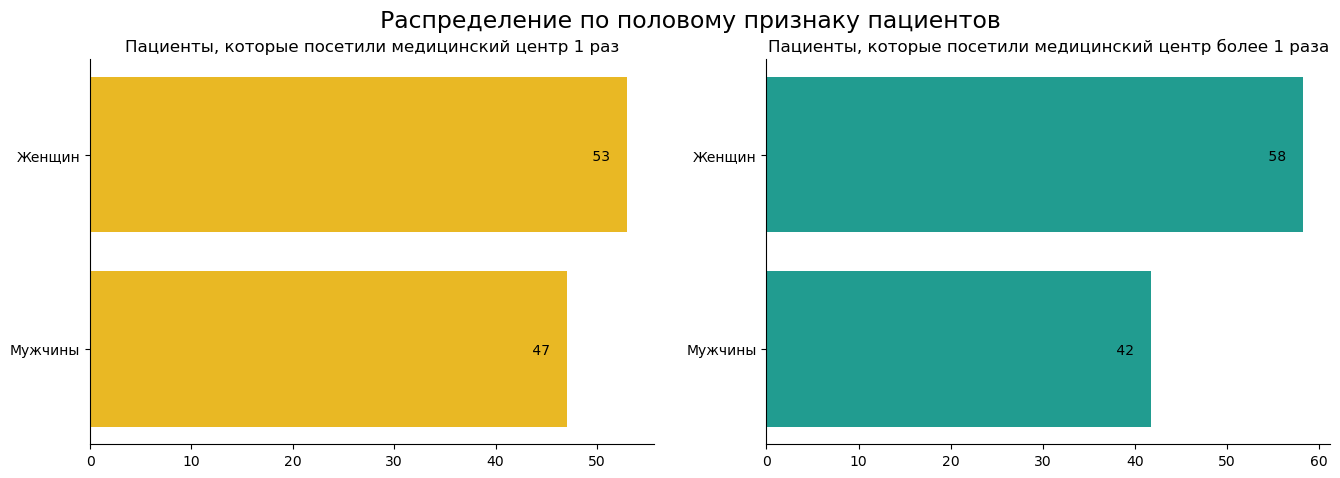

In [69]:
fig, ax = plt.subplots(figsize=(16, 5))

plt.subplot(1,2,1)
annotate_dig(sex_id_1['precent'],['Мужчины','Женщин'], color_1, 'Пациенты, которые посетили медицинский центр 1 раз')

plt.subplot(1,2,2)  
annotate_dig(sex_id_2['precent'],['Мужчины','Женщин'], color_2, "Пациенты, которые посетили медицинский центр более 1 раза")
    
plt.suptitle("Распределение по половому признаку пациентов", fontsize=17)
plt.show()

Больше половины пациентов женщины. У пациентов, которые посещали медицинский центр более одного раза перевес по женскому полу больше.

<Axes: title={'center': 'Разброс возрастов пациентов медицинского центра'}, xlabel='Возраст пациента, лет', ylabel='Frequency'>

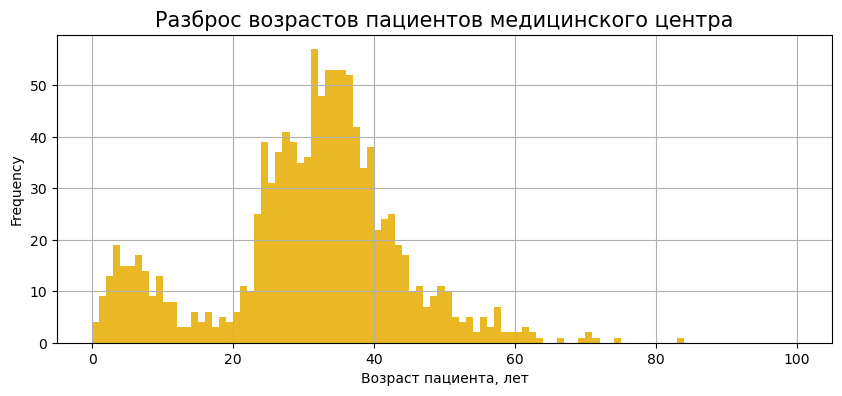

In [70]:
plt.xlabel("Возраст пациента, лет")
plt.title('Разброс возрастов пациентов медицинского центра', fontsize=15)
(profiles.loc[profiles['service_date_n']==1,'age_for_service_date']).plot(kind='hist', bins=100, range=(0, 100), figsize = (10,4), grid=True, color=color_1)

<Axes: title={'center': 'Разброс возрастов пациентов медицинского центра'}, xlabel='Возраст пациента, лет', ylabel='Frequency'>

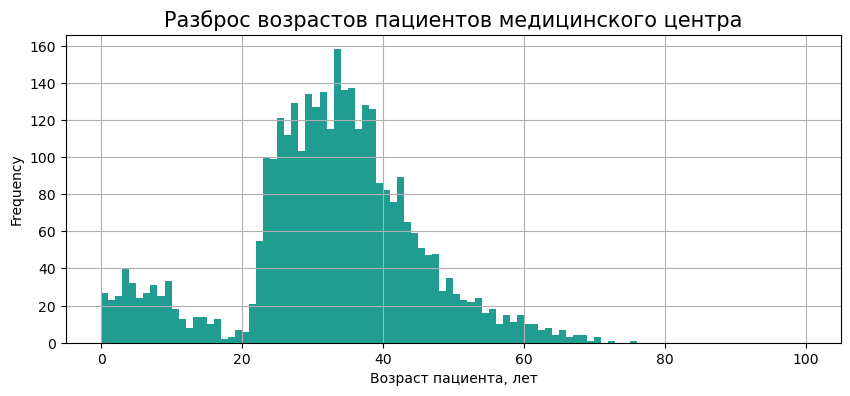

In [71]:
plt.xlabel("Возраст пациента, лет")
plt.title('Разброс возрастов пациентов медицинского центра', fontsize=15)
(profiles.loc[profiles['service_date_n']>1,'age_for_service_date']).plot(kind='hist', bins=100, range=(0, 100), figsize = (10,4), grid=True, color=color_2)

Большая часть пациентов медицинского центра от 22 до 40 лет. Разброс пациентов по возрасту в обоих граупах примерно одинаковый. Однако в группе пациентов, которые посещали мед. центр большеодного раза чуть больший процент в возрасте от 22 до 30 лет. и чуть меньше дошкольного возраста.

Посмотрим на распределение пациентов между полами по возрастным категориям. Рассмотрим структуру пациентов 1-ой группы (которые посетили медицинский центр 1 раз) 

In [72]:
type_of_age = profiles.loc[profiles['service_date_n']==1].pivot_table(index='type_of_age',columns='sex_id', values='insured',  aggfunc='count')
type_of_age.columns = ['m', 'w']
type_of_age['sum'] = type_of_age['m'] + type_of_age['w']
type_of_age['precent_m'] = type_of_age['m'] /type_of_age['sum'] * 100
type_of_age['precent_w'] = type_of_age['w'] /type_of_age['sum'] * 100
type_of_age

m      w    sum  precent_m  \
type_of_age                                                            
1.Дошкольники - 0-6 лет               48.00  44.00  92.00      52.17   
2.Школьники - 7-17 лет                41.00  36.00  77.00      53.25   
3.Молодые люди - 18-44 года          386.00 470.00 856.00      45.09   
4.Люди среднего возраста - 45-59 лет  48.00  45.00  93.00      51.61   
5.Люди пожилого возраста - 60-74 лет   9.00   5.00  14.00      64.29   
6.Старые люди - 75-90 лет              1.00    NaN    NaN        NaN   

                                      precent_w  
type_of_age                                      
1.Дошкольники - 0-6 лет                   47.83  
2.Школьники - 7-17 лет                    46.75  
3.Молодые люди - 18-44 года               54.91  
4.Люди среднего возраста - 45-59 лет      48.39  
5.Люди пожилого возраста - 60-74 лет      35.71  
6.Старые люди - 75-90 лет                   NaN

In [73]:
plot_graf(type_of_age.index, type_of_age['m'], 'Мужчины', type_of_age['w'], 'Женщины', "Распределение пациентов по возрасту и половому признаку","Количество")

Рассмотрим структуру пациентов 2-ой группы (которые посещали центр более 1 раза)

In [74]:
type_of_age = profiles.loc[profiles['service_date_n']>1].pivot_table(index='type_of_age',columns='sex_id', values='insured',  aggfunc='count')
type_of_age.columns = ['m', 'w']
type_of_age['sum'] = type_of_age['m'] + type_of_age['w']
type_of_age['precent_m'] = type_of_age['m'] /type_of_age['sum'] * 100
type_of_age['precent_w'] = type_of_age['w'] /type_of_age['sum'] * 100
type_of_age

m        w      sum  precent_m  \
type_of_age                                                                  
1.Дошкольники - 0-6 лет                112.00    86.00   198.00      56.57   
2.Школьники - 7-17 лет                  91.00    90.00   181.00      50.28   
3.Молодые люди - 18-44 года          1,003.00 1,520.00 2,523.00      39.75   
4.Люди среднего возраста - 45-59 лет   162.00   227.00   389.00      41.65   
5.Люди пожилого возраста - 60-74 лет    31.00    31.00    62.00      50.00   
6.Старые люди - 75-90 лет                 NaN     1.00      NaN        NaN   

                                      precent_w  
type_of_age                                      
1.Дошкольники - 0-6 лет                   43.43  
2.Школьники - 7-17 лет                    49.72  
3.Молодые люди - 18-44 года               60.25  
4.Люди среднего возраста - 45-59 лет      58.35  
5.Люди пожилого возраста - 60-74 лет      50.00  
6.Старые люди - 75-90 лет                   NaN

In [75]:
plot_graf(type_of_age.index, type_of_age['m'], 'Мужчины', type_of_age['w'], 'Женщины', "Распределение пациентов по возрасту и половому признаку","Количество")

По структуре среди всех пациентов можно сказать, что в целом среди пациентов больше женсского пола, в категорях:
* Дошкольники - 0-6 лет	
* Школьники - 7-17 лет
* Люди пожилого возраста - 60-74 лет

больше пациентов мужского пола. 

Если рассматривать пациентов в разрезе двух групп, то можно сказать:
* среди пациентов, которые возращались в возрасте 18-44 года намного больше перевес по женскому поолу.
* среди пациетов в возрасте 45-59 лет, которые возващались больше женщин, а среди ех кто не возращался - больше мужчин.


## 7. Выявление причин падения выручки медицинского центра с апреля по август 2022

На выручку влияют два фактора:
* количественный - количество оказываемых услуг
* ценовой - установленная цена на услуги.


### 7.1. Динамика пациентов и приобритения ими услуг

Гипотеза: Выручка изменилась из-за уменьшения количества пациентов

Так как большим фактором роста выручки является рост количества оказанных услуг, то рассмотрм фактор количества по подробнее. Посмотрим на состав данных о количестве оказанных услуг в разрезе пациентов:
* увеличилось количество пациентов?
* увеличилось количество обращений пациентов?

Посчитаем количество визитов всех пациентов в каждом месяце.

In [76]:
average = data.groupby(['insured','year','month']).agg({'service_date': 'nunique'})
average.reset_index(inplace= True) 
average = average.pivot_table(index='month', columns='year', values='service_date', aggfunc='sum')
average.columns = ['2021', '2022']
average['difference'] = average['2022'] - average['2021']
average['percent'] = (average['2022'] - average['2021']) / average['2021'] * 100
average

2021     2022  difference  percent
month                                       
1       743.00 1,413.00      670.00    90.17
2       803.00 1,551.00      748.00    93.15
3     1,180.00 1,920.00      740.00    62.71
4     1,423.00 2,286.00      863.00    60.65
5     1,329.00 2,311.00      982.00    73.89
6     1,341.00 2,155.00      814.00    60.70
7     1,226.00 1,753.00      527.00    42.99
8     1,362.00 1,045.00     -317.00   -23.27
9     1,602.00      NaN         NaN      NaN
10    1,823.00      NaN         NaN      NaN
11    1,467.00      NaN         NaN      NaN
12    1,561.00      NaN         NaN      NaN

Из таблицы видно, что количество пациентов, приходящих в клинику от месяца к месяцу растет. Небольшое падение в июле 2022 и резкое - в августе 2022.

Посчитаем количество уникальных пациентов в каждом месяце

In [77]:
insured = data.groupby(['year','month']).agg({'insured': ('nunique', 'count')})
insured.reset_index(inplace= True) 
insured.columns = ['year', 'month','nunique', 'count']
insured = insured.pivot_table(index='month', columns='year', values=('nunique','count'), aggfunc='sum')
insured.columns = ['count_2021', 'count_2022', 'nunique_2021', 'nunique_2022']
insured['difference_nunique'] = insured['nunique_2022'] - insured['nunique_2021']
insured['percent_nunique'] = (insured['nunique_2022'] - insured['nunique_2021']) / insured['nunique_2021'] * 100
insured[['nunique_2021', 'nunique_2022', 'difference_nunique', 'percent_nunique']]

nunique_2021  nunique_2022  difference_nunique  percent_nunique
month                                                                 
1            286.00        555.00              269.00            94.06
2            309.00        589.00              280.00            90.61
3            446.00        662.00              216.00            48.43
4            467.00        794.00              327.00            70.02
5            469.00        802.00              333.00            71.00
6            435.00        738.00              303.00            69.66
7            447.00        641.00              194.00            43.40
8            488.00        359.00             -129.00           -26.43
9            559.00           NaN                 NaN              NaN
10           591.00           NaN                 NaN              NaN
11           539.00           NaN                 NaN              NaN
12           560.00           NaN                 NaN              NaN

Из данных видно, что в 2022 году по сравнению к 2021 количество уникальных пациентов в месяц значительно увеличилось. По сравнению с 2021 годом прирос составил от 43 до 94%, за исключение августа, где наблюдается резкое снижение на 26,43%.

Посмотрим на тенденцию количества услуг на каждого пациента в месяц

In [78]:
insured['quantity_per_patient_2021'] = insured['nunique_2021'] / insured['count_2021']
insured['quantity_per_patient_2022'] = insured['nunique_2022'] / insured['count_2022']
insured['dif_q_per_patient'] = insured['quantity_per_patient_2022'] - insured['quantity_per_patient_2021']
insured['percent_q_per_patient'] = (insured['quantity_per_patient_2022'] - insured['quantity_per_patient_2021']) / insured['quantity_per_patient_2021'] * 100
insured[['quantity_per_patient_2021', 'quantity_per_patient_2022', 'dif_q_per_patient', 'percent_q_per_patient']]

quantity_per_patient_2021  quantity_per_patient_2022  \
month                                                         
1                           0.14                       0.13   
2                           0.15                       0.13   
3                           0.12                       0.12   
4                           0.12                       0.12   
5                           0.12                       0.13   
6                           0.11                       0.13   
7                           0.13                       0.13   
8                           0.13                       0.12   
9                           0.13                        NaN   
10                          0.12                        NaN   
11                          0.13                        NaN   
12                          0.13                        NaN   

       dif_q_per_patient  percent_q_per_patient  
month                                            
1                  -0.01                  -5.34  
2                  -0.02                 -11.88  
3                  -0.00                  -1.10  
4                  -0.00                  -1.70  
5                   0.00                   1.62  
6                   0.02                  15.21  
7                   0.01                   5.01  
8                  -0.01                  -8.15  
9                    NaN                    NaN  
10                   NaN                    NaN  
11                   NaN                    NaN  
12                   NaN                    NaN

Среднее значение услуг на каждого пациента примерно одинаково в каждом месяце. 

Так что основным фактором количественного роста оказанных услуг является расширение клиентской базы медицинского центра. При этом август 2022 года в этом плане явлеятся провальным, так как уменьшилось количество как общее количество оказынх услуг в месяц так и количество уникальнх пациентов.

Если смотреть на общие показатели, количества пациентов и выручки, то видно, что до августа 2022 идет прирост количества оказываемых услуг. В августе идет снижение. Расмотрем более подробно динимику оказываемых услуг в разрезе пациентов по:
* половому признаку
* возрастной категории

In [79]:
#Формула для формирования сводной таблицы в разрезах
def pivot_patient(data_work, name_values, name_function, category_age):
    new_patient = (data_work
               .loc[data_work['type_of_age']==category_age]
               .pivot_table(index='month',columns=('year','sex_id'), values=name_values,  aggfunc=name_function))
    new_patient.columns = ['m_2021', 'w_2021','m_2022', 'w_2022']
    new_patient['difference_m'] = new_patient['m_2022'] - new_patient['m_2021'] 
    new_patient['difference_w'] = new_patient['w_2022'] - new_patient['w_2021']
    return new_patient

Посмотрим на категорию '1.Дошкольники - 0-6 лет'

In [80]:
# данные по количеству услуг
pivot_patient(data, 'insured', 'count', '1.Дошкольники - 0-6 лет')

m_2021  w_2021  m_2022  w_2022  difference_m  difference_w
month                                                            
1       81.00   32.00   43.00   55.00        -38.00         23.00
2       91.00   58.00   55.00   70.00        -36.00         12.00
3       65.00   70.00   93.00  119.00         28.00         49.00
4       94.00  103.00  116.00  172.00         22.00         69.00
5       58.00   71.00  174.00   83.00        116.00         12.00
6       66.00  112.00  128.00   94.00         62.00        -18.00
7       49.00   73.00  162.00   93.00        113.00         20.00
8       84.00   72.00   50.00   25.00        -34.00        -47.00
9       92.00  123.00     NaN     NaN           NaN           NaN
10     146.00  151.00     NaN     NaN           NaN           NaN
11      52.00   68.00     NaN     NaN           NaN           NaN
12      53.00  122.00     NaN     NaN           NaN           NaN

In [81]:
# данные по выручке
pivot_patient(data, 'service_amount', 'sum', '1.Дошкольники - 0-6 лет')

m_2021     w_2021     m_2022     w_2022  difference_m  difference_w
month                                                                        
1      89,919.00  45,608.00  53,370.00  67,680.00    -36,549.00     22,072.00
2     120,119.00  85,787.00  75,010.00  76,600.00    -45,109.00     -9,187.00
3      75,772.00  72,484.00 107,940.00 132,910.00     32,168.00     60,426.00
4     114,364.00 115,058.00 127,280.00 192,730.00     12,916.00     77,672.00
5      76,905.00  78,259.00 193,810.00 100,490.00    116,905.00     22,231.00
6      85,106.00 132,849.00 128,720.00 104,880.00     43,614.00    -27,969.00
7      56,759.00  86,238.00 179,639.00 109,282.00    122,880.00     23,044.00
8      88,933.00  79,815.00  41,593.00  43,505.00    -47,340.00    -36,310.00
9      78,804.00 116,895.00        NaN        NaN           NaN           NaN
10    148,540.00 162,870.00        NaN        NaN           NaN           NaN
11     62,110.00  76,620.00        NaN        NaN           NaN           NaN
12     64,410.00 130,600.00        NaN        NaN           NaN           NaN

У категории 'Дошкольники - 0-6 лет' наблюдается:
* падение как объема оказанных услуг так и выручке по мужскому полу в январе и феврале 2022, тогда как по общему объему в эти периоды наблюдается рост.
* падение как объема оказанных услуг так и выручке по женскому полу в июне 2022, тогда как по общему объему в этот период наблюдается рост.
* падение как объема оказанных услуг так и выручке по обоим полам в августе 2022 как и в целом по общему количеству
* значительный прирост по выручке и количеству оказанных услуг по мужскому полу в мае и июле 2022

Посмотрим на категорию '2.Школьники - 7-17 лет'

In [82]:
# данные по количеству услуг
pivot_patient(data, 'insured', 'count', '2.Школьники - 7-17 лет')

m_2021  w_2021  m_2022  w_2022  difference_m  difference_w
month                                                            
1       46.00   54.00  105.00   98.00         59.00         44.00
2       55.00  116.00   83.00   65.00         28.00        -51.00
3       83.00  132.00   83.00   97.00          0.00        -35.00
4       96.00  116.00  164.00  152.00         68.00         36.00
5       25.00   91.00   79.00  114.00         54.00         23.00
6       35.00   41.00   59.00   77.00         24.00         36.00
7       16.00   49.00   88.00   43.00         72.00         -6.00
8       80.00   73.00   27.00   15.00        -53.00        -58.00
9      199.00  196.00     NaN     NaN           NaN           NaN
10     174.00   79.00     NaN     NaN           NaN           NaN
11      44.00   73.00     NaN     NaN           NaN           NaN
12      98.00  103.00     NaN     NaN           NaN           NaN

In [83]:
# данные по выручке
pivot_patient(data, 'service_amount', 'sum', '2.Школьники - 7-17 лет')

m_2021     w_2021     m_2022     w_2022  difference_m  difference_w
month                                                                        
1      61,277.00  52,587.00 125,450.00 113,960.00     64,173.00     61,373.00
2      60,887.00 131,548.00  93,170.00  77,820.00     32,283.00    -53,728.00
3      86,627.00 147,316.00  98,980.00 111,540.00     12,353.00    -35,776.00
4      97,729.00 113,562.00 179,410.00 157,530.00     81,681.00     43,968.00
5      26,392.00  93,100.00  84,690.00 125,340.00     58,298.00     32,240.00
6      37,415.00  39,144.00  58,840.00  80,630.00     21,425.00     41,486.00
7      17,726.00  60,902.00 104,002.00  69,070.00     86,276.00      8,168.00
8      73,382.00  81,291.00  36,537.00  15,792.00    -36,845.00    -65,499.00
9     195,223.00 199,839.00        NaN        NaN           NaN           NaN
10    184,420.00  80,010.00        NaN        NaN           NaN           NaN
11     53,720.00  89,610.00        NaN        NaN           NaN           NaN
12    103,240.00 114,990.00        NaN        NaN           NaN           NaN

У категории 'Школьники - 7-17 лет' наблюдается:
* падение как объема оказанных услуг так и выручке по женскому полу в феврале и марте 2022, тогда как по общему объему в эти периоды наблюдается рост.
* падение как объема оказанных услуг так и выручке по обоим полам в августе 2022 как и в целом по общему количеству
* значительный прирост по выручке и количеству оказанных услуг по мужскому полу в апреле и июле 2022

Посмотрим на категорию '3.Молодые люди - 18-44 года'

In [84]:
# данные по количеству услуг
pivot_patient(data, 'insured', 'count', '3.Молодые люди - 18-44 года')

m_2021   w_2021   m_2022   w_2022  difference_m  difference_w
month                                                                
1       485.00 1,024.00 1,414.00 1,903.00        929.00        879.00
2       407.00   960.00 1,550.00 2,042.00      1,143.00      1,082.00
3       999.00 1,745.00 1,775.00 2,463.00        776.00        718.00
4       979.00 1,741.00 1,618.00 3,440.00        639.00      1,699.00
5       955.00 1,989.00 1,495.00 3,487.00        540.00      1,498.00
6     1,195.00 1,733.00 1,468.00 3,045.00        273.00      1,312.00
7     1,250.00 1,500.00 1,383.00 2,279.00        133.00        779.00
8     1,214.00 1,757.00   693.00 1,679.00       -521.00        -78.00
9     1,101.00 1,836.00      NaN      NaN           NaN           NaN
10    1,520.00 2,366.00      NaN      NaN           NaN           NaN
11    1,107.00 2,137.00      NaN      NaN           NaN           NaN
12    1,377.00 1,696.00      NaN      NaN           NaN           NaN

In [85]:
# данные по выручке
pivot_patient(data, 'service_amount', 'sum', '3.Молодые люди - 18-44 года')

m_2021       w_2021       m_2022       w_2022  difference_m  \
month                                                                     
1       579,556.00 1,082,939.00 1,640,970.00 2,282,730.00  1,061,414.00   
2       454,836.00 1,051,720.00 1,742,280.00 2,445,375.00  1,287,444.00   
3     1,091,032.00 1,813,518.00 2,117,660.00 2,871,890.00  1,026,628.00   
4     1,101,001.00 1,967,387.00 2,052,370.00 4,089,520.00    951,369.00   
5     1,174,247.00 2,203,557.00 1,760,600.00 4,241,810.00    586,353.00   
6     1,363,204.00 1,924,345.00 1,745,800.00 3,678,240.00    382,596.00   
7     1,405,165.00 1,555,688.00 1,780,668.00 2,903,772.00    375,503.00   
8     1,393,960.00 1,985,442.00   868,178.00 2,035,457.00   -525,782.00   
9     1,326,680.00 2,060,896.00          NaN          NaN           NaN   
10    1,829,340.00 2,837,720.00          NaN          NaN           NaN   
11    1,286,990.00 2,459,960.00          NaN          NaN           NaN   
12    1,663,180.00 1,984,250.00          NaN          NaN           NaN   

       difference_w  
month                
1      1,199,791.00  
2      1,393,655.00  
3      1,058,372.00  
4      2,122,133.00  
5      2,038,253.00  
6      1,753,895.00  
7      1,348,084.00  
8         50,015.00  
9               NaN  
10              NaN  
11              NaN  
12              NaN

У категории 'Молодые люди - 18-44 года' наблюдается: 
* падение как объема оказанных услуг так и выручке по обоим полам в августе 2022 как и в целом по общему количеству. Причем по мужскому полу падение очень значительное, как по абсолютное так и относительное.
* значительный прирост по выручке и количеству оказанных услуг по обоим полам в январе и феврале 2022
* значительный прирост по выручке и количеству оказанных услуг по женскому полу в апреле - июле 2022

Посмотрим на категорию '4.Люди среднего возраста - 45-59 лет'

In [86]:
# данные по количеству услуг
pivot_patient(data, 'insured', 'count', '4.Люди среднего возраста - 45-59 лет')

m_2021  w_2021  m_2022  w_2022  difference_m  difference_w
month                                                            
1       79.00  136.00  202.00  238.00        123.00        102.00
2      108.00  174.00  246.00  404.00        138.00        230.00
3      141.00  404.00  201.00  637.00         60.00        233.00
4      245.00  438.00  328.00  598.00         83.00        160.00
5      140.00  364.00  234.00  570.00         94.00        206.00
6      222.00  351.00  296.00  500.00         74.00        149.00
7      269.00  311.00  231.00  414.00        -38.00        103.00
8      149.00  244.00  185.00  283.00         36.00         39.00
9      232.00  393.00     NaN     NaN           NaN           NaN
10     214.00  347.00     NaN     NaN           NaN           NaN
11     279.00  259.00     NaN     NaN           NaN           NaN
12     382.00  329.00     NaN     NaN           NaN           NaN

In [87]:
# данные по выручке
pivot_patient(data, 'service_amount', 'sum', '4.Люди среднего возраста - 45-59 лет')

m_2021     w_2021     m_2022     w_2022  difference_m  difference_w
month                                                                        
1     100,498.00 168,183.00 202,500.00 235,200.00    102,002.00     67,017.00
2     111,396.00 177,330.00 256,000.00 449,390.00    144,604.00    272,060.00
3     130,880.00 418,810.00 242,750.00 675,760.00    111,870.00    256,950.00
4     272,134.00 521,965.00 376,670.00 704,100.00    104,536.00    182,135.00
5     152,706.00 391,107.00 260,210.00 660,520.00    107,504.00    269,413.00
6     235,138.00 464,046.00 355,560.00 597,350.00    120,422.00    133,304.00
7     306,194.00 335,942.00 320,633.00 569,889.00     14,439.00    233,947.00
8     176,059.00 291,349.00 246,930.00 344,905.00     70,871.00     53,556.00
9     298,097.00 440,731.00        NaN        NaN           NaN           NaN
10    267,080.00 469,670.00        NaN        NaN           NaN           NaN
11    308,940.00 322,480.00        NaN        NaN           NaN           NaN
12    414,930.00 394,940.00        NaN        NaN           NaN           NaN

У категории 'Люди среднего возраста - 45-59 лет' наблюдается:
* падение объема оказанных услуг по мужскому полу в июле 2022, тогда как по выручке наблдается рост.
* значительный прирост по выручке и количеству оказанных услуг по обоим полам в январе и феврале 2022
* значительный прирост по выручке и количеству оказанных услуг по женскому полу в апреле - июле 2022
* рост в августе по количеству и выручке  по обоим полам в отличии от всех остальных категорий

Посмотрим на категорию '5.Люди пожилого возраста - 60-74 лет'

In [88]:
# данные по количеству услуг
pivot_patient(data, 'insured', 'count', '5.Люди пожилого возраста - 60-74 лет')

m_2021  w_2021  m_2022  w_2022  difference_m  difference_w
month                                                            
1       34.00   50.00   59.00   26.00         25.00        -24.00
2       65.00   85.00   51.00    2.00        -14.00        -83.00
3       25.00   32.00   29.00   32.00          4.00          0.00
4       27.00   28.00   16.00   88.00        -11.00         60.00
5       67.00   27.00   39.00   99.00        -28.00         72.00
6       31.00  128.00   53.00   45.00         22.00        -83.00
7       12.00   16.00   60.00   88.00         48.00         72.00
8       48.00   61.00   47.00   25.00         -1.00        -36.00
9       19.00   38.00     NaN     NaN           NaN           NaN
10      32.00   24.00     NaN     NaN           NaN           NaN
11      12.00   42.00     NaN     NaN           NaN           NaN
12      58.00   70.00     NaN     NaN           NaN           NaN

In [89]:
# данные по выручке
pivot_patient(data, 'service_amount', 'sum', '5.Люди пожилого возраста - 60-74 лет')

m_2021     w_2021    m_2022     w_2022  difference_m  difference_w
month                                                                      
1     34,400.00  50,964.00 49,110.00  29,350.00     14,710.00    -21,614.00
2     54,449.00 129,583.00 57,280.00  12,800.00      2,831.00   -116,783.00
3     39,962.00  50,847.00 37,640.00  34,990.00     -2,322.00    -15,857.00
4     39,695.00  34,809.00 18,710.00 136,760.00    -20,985.00    101,951.00
5     74,604.00  26,631.00 44,600.00 116,040.00    -30,004.00     89,409.00
6     31,350.00 208,675.00 68,940.00  60,620.00     37,590.00   -148,055.00
7      7,975.00  39,620.00 72,119.00 107,424.00     64,144.00     67,804.00
8     65,001.00  75,757.00 54,008.00  30,874.00    -10,993.00    -44,883.00
9     19,028.00  46,666.00       NaN        NaN           NaN           NaN
10    38,770.00  31,290.00       NaN        NaN           NaN           NaN
11     9,840.00  75,680.00       NaN        NaN           NaN           NaN
12    67,130.00  72,680.00       NaN        NaN           NaN           NaN

У категории 'Люди пожилого возраста - 60-74 лет' наблюдается:
* падение как объема оказанных услуг так и выручке по мужскому полу в январе - феврале и в июне 2022, тогда как по общему объему в эти периоды наблюдается рост.
* падение как объема оказанных услуг так и выручке по женскому полу в апреле- мае 2022, тогда как по общему объему в эти периоды наблюдается рост.
* падение как объема оказаных услуг так и выручке по обоим полам в августе 2022

Анализировать категорию "6.Старые люди - 75-90 лет" нет смысла в виду незначительности выборки.

**Общий вывод:** 
Наибольшая просадка идет по пациентам мужского пола, относящихся к категории "Молодые люди - 18-44 года" в августе 2022.

Гипотеза: Выручка изменилась из-за расширения списка оказываемых услуг

Одним из факторов посещения медицинского центра являтся широкий диапозон предоставляемых услуг. Посмотрим на тенденцию количества уникальных услуг, оказаных в каждом месяце.

In [90]:
service_name = data.groupby(['year','month']).agg({'service_name': 'nunique'})
service_name.reset_index(inplace= True) 
service_name.columns = ['year', 'month','nunique']
service_name = service_name.pivot_table(index='month', columns='year', values='nunique', aggfunc='sum')
service_name.columns = ['count_2021', 'count_2022']
service_name['difference_nunique'] = service_name['count_2022'] - service_name['count_2021']
service_name['percent_nunique'] = (service_name['count_2022'] - service_name['count_2021']) / service_name['count_2021'] * 100
service_name

count_2021  count_2022  difference_nunique  percent_nunique
month                                                             
1          255.00      298.00               43.00            16.86
2          284.00      334.00               50.00            17.61
3          345.00      389.00               44.00            12.75
4          296.00      414.00              118.00            39.86
5          325.00      389.00               64.00            19.69
6          335.00      369.00               34.00            10.15
7          300.00      355.00               55.00            18.33
8          304.00      319.00               15.00             4.93
9          311.00         NaN                 NaN              NaN
10         329.00         NaN                 NaN              NaN
11         334.00         NaN                 NaN              NaN
12         360.00         NaN                 NaN              NaN

Количество уникальных услуг в каждом месяце находится в диапозоне от 284 до 414. По данным не видно резкого скочка количества уникальных услуг, так что вряд ли можно говорить о расширении количества услуг, ну или оно было в незначительном размере.

Посмотрим в разрезе категорий

In [91]:
service_name = data.loc[data['type_of_service']=='Прием врача'].groupby(['year','month']).agg({'service_name': 'nunique'})
service_name.reset_index(inplace= True) 
service_name.columns = ['year', 'month','nunique']
service_name = service_name.pivot_table(index='month', columns='year', values='nunique', aggfunc='sum')
service_name.columns = ['count_2021', 'count_2022']
service_name['difference_nunique'] = service_name['count_2022'] - service_name['count_2021']
service_name['percent_nunique'] = (service_name['count_2022'] - service_name['count_2021']) / service_name['count_2021'] * 100
service_name

count_2021  count_2022  difference_nunique  percent_nunique
month                                                             
1           13.00       47.00               34.00           261.54
2           11.00       49.00               38.00           345.45
3           10.00       52.00               42.00           420.00
4           10.00       50.00               40.00           400.00
5            9.00       52.00               43.00           477.78
6           11.00       52.00               41.00           372.73
7           10.00       52.00               42.00           420.00
8           10.00       48.00               38.00           380.00
9            8.00         NaN                 NaN              NaN
10          10.00         NaN                 NaN              NaN
11          47.00         NaN                 NaN              NaN
12          50.00         NaN                 NaN              NaN

Как видно из таблицы в ноябре 2021 года более чем в 5 раз увеличилось количество уникальных оказываемых услуг. Либо расширили базу наименований либо начали оказывать новые услуги в категории "Прием врача" 

In [92]:
service_name = data.loc[data['type_of_service']=='Анализ / Процедура'].groupby(['year','month']).agg({'service_name': 'nunique'})
service_name.reset_index(inplace= True) 
service_name.columns = ['year', 'month','nunique']
service_name = service_name.pivot_table(index='month', columns='year', values='nunique', aggfunc='sum')
service_name.columns = ['count_2021', 'count_2022']
service_name['difference_nunique'] = service_name['count_2022'] - service_name['count_2021']
service_name['percent_nunique'] = (service_name['count_2022'] - service_name['count_2021']) / service_name['count_2021'] * 100
service_name

count_2021  count_2022  difference_nunique  percent_nunique
month                                                             
1          242.00      251.00                9.00             3.72
2          273.00      285.00               12.00             4.40
3          335.00      337.00                2.00             0.60
4          286.00      364.00               78.00            27.27
5          316.00      337.00               21.00             6.65
6          324.00      317.00               -7.00            -2.16
7          290.00      303.00               13.00             4.48
8          294.00      271.00              -23.00            -7.82
9          303.00         NaN                 NaN              NaN
10         319.00         NaN                 NaN              NaN
11         287.00         NaN                 NaN              NaN
12         310.00         NaN                 NaN              NaN

В категории "Анализ / Процедура" значительных анамалий не наблюдается.

**Вывод**

Количество пациентов, приходящих в клинику от месяца к месяцу растет. Небольшое падение в июле 2022 и резкое - в августе 2022.  При этом среднее значение услуг на каждого пациента примерно одинаково в каждом месяце.

Так что основным фактором количественного роста с февраля по апреля - является расширение клиентской базы медицинского центра. При этом в августе 2022 года наибольшая просадка идет по пациентам мужского пола, относящихся к категории "Молодые люди - 18-44 года". Из ходя из того, что падение произошло  среди мужской части пациентов в возрасте от 18-44, то можно говорить о том, что это связано с эмиграцией населения связаной с геополитической обстановкой в РФ.

По данным ФСБ: Всего с июля по сентябрь число выездов за рубеж составило 9,7 млн, что почти в два раза больше по сравнению со вторым кварталом года (тогда число выездов составило 5 млн) и на 1,2 млн превысило выезды в июле—сентябре прошлого года. В то же время количество выездов за рубеж оказалось ниже показателей допандемийного 2019 года — тогда за аналогичный период ФСБ зафиксировала 16,1 млн выездов


В ноябре 2021 года медицинский центр пересмотрел и расширил по наименованию услуги по приему врачей.
 

### 7.2. Ценовая политика

Гипотеза: Выручка изменилась из-за повышения цен на услуги

С октября 2021 года наблюдается снижение выручки, которое в дальнейшем компенсируется значительным ростом вплоть до апреля 2022 года. С мая начинается падение и в августе 2022 года выручка падает на уровень ниже аналогичного периода 2021 года.

В октябре 2021 мединцинский центр увеличил стоимость части услуг в среднем на 5%. Что примерно на уровне годовой инфляции последних лет:
* 2016г. – 5,4%
* 2017г. – 2,5%
* 2018г. – 4,3%
* 2019г. – 3,0%
* 2020г. – 4,9%
* 2021г. – 8,39%

Следующее изменение цены было в июле 2022 - в среднем на 8%. 

Посмотрим на статистику использования услугой после повышения цен.

In [93]:
slice_data = data.pivot_table(index='service_name', columns='data_s', values='insured', aggfunc='count').fillna(0)
#счетчики месяцов
i_10_2021 = 0
i_7_2022 = 0
i = 0 
# Расчитаем среднее по пользованию услугами до повышения цен и после
for item in slice_data:
    if item < datetime(2021,10,1):
        slice_data['before_10.2021']  = + slice_data[item]
        i_10_2021 = i_10_2021 + 1
    elif item > datetime(2021,9,1) and item < datetime(2022,7,1):
        slice_data['before_7.2022']  = + slice_data[item]
        i_7_2022 = i_7_2022 + 1
    else:
        slice_data['after_7.2022']  = + slice_data[item]
        i = i + 1
slice_data['before_10.2021'] = round(slice_data['before_10.2021']/i_10_2021,2)
slice_data['before_7.2022']= round(slice_data['before_7.2022']/i_7_2022,2)
slice_data['after_7.2022']= round(slice_data['after_7.2022']/i,2)
slice_data.reset_index(inplace= True) 

servise = slice_data[['service_name','before_10.2021', 'before_7.2022', 'after_7.2022']]
servise = servise.merge(price_2021_10[['service_name','2021_10']], on='service_name', how='left')
servise = servise.merge(price_2022_7[['service_name','2022_7']], on='service_name', how='left')
servise = servise.loc[~servise['2021_10'].isna() | ~servise['2022_7'].isna()]
# Расчитаем показатели, показывающие увеличилось ли среднее использование услугой после повышения цен
servise['2021_10_percent'] = servise['before_7.2022'] / servise['before_10.2021']
servise['2022_7_percent'] = servise['after_7.2022'] / servise['before_7.2022']
servise.replace([np.inf , -np.inf ], 0 , inplace= True)

In [94]:
servise.loc[(servise["2021_10_percent"] > 0) & (servise["2021_10_percent"] < 1), 'service_name'].count()

56

После изменения цен в октябре только у 18% (56 из 309) услуг уменьшился показатель среднемесячного оказания. 

In [95]:
servise.loc[(servise["2022_7_percent"] > 0) & (servise["2022_7_percent"] < 1), 'service_name'].count()

18

После изменения цен в июле только у 6% (18 из 306) услуг уменьшился показатель среднемесячного оказания. 

Не высокий процент подняти цен и такие низкие % уменьшения пользования услугами, говорят о незначительности влияния фактора повышения цен на привлечение пациентов.

## 7. Вывод

От медицинского центра получены данные за период с января 2021 по август 2022 года включительно об оказанных услугах и сумме выплат за них.

Оборот медициенского центра в 2022 году значительно превосходит оборот в  2021 году в сопостовиемые месяцы, за исключением августа 2022. Если смотреть тенденцию от месяца к месяцу в 2022 году по выручке:
* В январе по сравнению с декабрем наблюдается снижение на 4,19%, что не удивительно, так как почти 3 месяц - праздничные дни.
* С февраля по апрель начинается стабильный рост и в апреле была максимальная выручка в размере 8 035 080,00 рублей. 
* С мая 2022 наблюдается падение выручки от месяца к месяцу
* В августе 2022 резкое снижение на 40,19%  - по сравнению с июлем 2022 и на 13,76%  - по сравнению с августом 2021

Рост выручки в с февраля по апрель 2022 года связано увеличением количества оказываемых услуг по следующим катгегориям:
1. Прием врача
2. Анализ
3. Аппаратное исследование

С апреля падение выручки происходит практически по все категориям и в особенности по выше указанными, где падение самое максимальное.

Основным драйвером падения выручки является уменьшение количества пациентов. Наибольшиее падение случилось в августе 2022 в мужской части пациентов из категории "Молодые люди - 18-44 года". Из ходя из периода и характера падения следует, что основным фактором были текущая геополитическая ситуация в РФ и рост эмиграции в 3 кварате 2022. По данным ФСБ с июля по сентябрь число выездов за рубеж составило 9,7 млн, что почти в два раза больше по сравнению со вторым кварталом 2021 года.

Небольшой вклад в уменьшение клиентов оказало повышение цены услуг. За исследуемый период было два случая изменения цен на услуги в медицинском центре:
* октябрь 2021 - стоимость части услуг в среднем на 5%. Что примерно на уровне годовой инфляции последних лет.
* июль 2022 -  было изменение цены так же по некоторым услугам в среднем на 8%.

Но в целом, повышение цен не оказало существенного влияния на отток пациентов. Если смотреть на количество услуг на каждого пациента, то в среднем она практически не изменилось, что кговорит о том, что действующие пациенты покупают такое же количество услуг, что и раньше.

Для повышения выручки до конца текущей геополитической ситуации медицинскому центру необходимо сконцентровать свою маркетинговую и ценовую политику в отношении других категорий пациентов:
* Женской части категории "Молодые люди - 18-44 года", которая является одной из самой большой в клиентской базе медицинского центра
* Детской части с привлечением через действющих клиентов категории "Молодые люди - 18-44 года"



Проверенные гиптезы:
* Выручка изменилась из-за уменьшения количества пациентов - Да, выручка сократилась, из-за оттока пациентов, особенно в августе в части мужчин от 18 до 44 лет"
* Выручка изменилась из-за повышения цен на услуги - Да, но влияние минимально.
* Вручка изменилась из-за уменьшения среднего чека  - Нет, средний чек растет с переменным успехом
* Выручка изменилась из-за расширения списка оказываемых услуг. - Нет, в октябре внесли изменения в список оказваемых услуг (разделив слугу прием первичный и прием повторный на приемы врачей по направления) но в целом количество оказанных уникальных услуг в месяц плюс-минус одно и тоже.